In [1]:
#The purpose of this notebook is to derive multivariate regressions and plots for WRF cells comparing observing site and CI location stats

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
import dask
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
import pandas as pd
import datetime

import seaborn as sns

from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from scipy.stats import theilslopes
from scipy.stats import pearsonr
from scipy.stats import spearmanr

from scipy.stats import studentized_range

import pingouin as pg

In [2]:
#data directory for wrf cell track stats
#fdir = '/pscratch/sd/a/avarble/cacti/cell_tracks/wrf_cell_tracks/stats/'
fdir = '/global/cfs/projectdirs/m1657/jmarquis/jupylabs/'

In [3]:
#dataset for naming figures
strdata = 'wID'

In [4]:
#Cell area thresholds for filtering
#3-km
diam1 = 7
diam2 = 12
# diam3 = 14
diam3 = 16
diam4 = 200
axis1 = 7
axis2 = 10
axis3 = 13
axis4 = 200

In [5]:
#locind=0 (AMF) or locind=1 (CI)
#timeind=0 (60 min before CI) up to timeind=16 (at CI)
amflocind = 0
amftimeind = 16
cilocind = 1
citimeind = 12

In [6]:
def pearsonr_pvalues(df):
    cols = pd.DataFrame(columns=df.columns)
    p = cols.transpose().join(cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return p

In [7]:
def spearmanr_pvalues(df):
    cols = pd.DataFrame(columns=df.columns)
    p = cols.transpose().join(cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = round(spearmanr(tmp[r], tmp[c])[1], 4)
    return p

    

In [8]:
#cell track statistics
data = xr.open_dataset(os.path.join(fdir, 'WIDmetricsForShapleyB_c1p11h1p13t_wraw_wmag025_cobj1e3MFC_SDCsmj1p5_e3R_v13b_topf_widcull.nc'))

CLD_area = data['CLDupdraft_area']
CLD_rad = data['CLDupdraft_Radius']
CLD_top = data['CLDupdraft_topZasl']

ENV_RHa    = data['Nearcloud_acblRH']
ENV_RH500    = data['Nearcloud_RH500']
ENV_RH600    = data['Nearcloud_RH600']
ENV_RH5km    = data['Nearcloud_RH5km']
ENV_RH6km    = data['Nearcloud_RH6km']
ENV_THe   = data['Nearcloud_acblTHE']
ENV_aCAPE = data['Nearcloud_acblCAPE']
ENV_dCAPE = data['Nearcloud_deepCAPE']
ENV_S06   = data['Nearcloud_shear06']
ENV_swathmag = data['MesoAscent_Wmag']
ENV_swathwidth = data['MesoAscent_width']
ENV_swathdepthlfc = data['MesoAscent_DepthPerLfc']


/global/homes/j/jmarquis/.conda/envs/JIMenv/lib/python3.8/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
/global/homes/j/jmarquis/.conda/envs/JIMenv/lib/python3.8/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'gini' loading failed:
No module named 'pint'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [9]:
# # break up by case

#print(CLD_area.shape)

CLD_area_29N          =  CLD_area[0,:,:].values.flatten()
CLD_rad_29N           =  CLD_rad[0,:,:].values.flatten()
CLD_top_29N           =  CLD_top[0,:,:].values.flatten()
ENV_RHa_29N           =  ENV_RHa[0,:,:].values.flatten()
ENV_RH500_29N         =  ENV_RH500[0,:,:].values.flatten()
ENV_RH600_29N         =  ENV_RH600[0,:,:].values.flatten()
ENV_RH5km_29N         =  ENV_RH5km[0,:,:].values.flatten()
ENV_RH6km_29N         =  ENV_RH6km[0,:,:].values.flatten()
ENV_THe_29N           =  ENV_THe[0,:,:].values.flatten()
ENV_aCAPE_29N         =  ENV_aCAPE[0,:,:].values.flatten()
ENV_dCAPE_29N         =  ENV_dCAPE[0,:,:].values.flatten()
ENV_S06_29N           =  ENV_S06[0,:,:].values.flatten()
ENV_swathmag_29N      =  ENV_swathmag[0,:,:].values.flatten()
ENV_swathwidth_29N    =  ENV_swathwidth[0,:,:].values.flatten()
ENV_swathdepthlfc_29N =  ENV_swathdepthlfc[0,:,:].values.flatten()

CLD_area_04D          =  CLD_area[1,:,:].values.flatten()
CLD_rad_04D           =  CLD_rad[1,:,:].values.flatten()
CLD_top_04D           =  CLD_top[1,:,:].values.flatten()
ENV_RHa_04D           =  ENV_RHa[1,:,:].values.flatten()
ENV_RH500_04D         =  ENV_RH500[1,:,:].values.flatten()
ENV_RH600_04D         =  ENV_RH600[1,:,:].values.flatten()
ENV_RH5km_04D         =  ENV_RH5km[1,:,:].values.flatten()
ENV_RH6km_04D         =  ENV_RH6km[1,:,:].values.flatten()
ENV_THe_04D           =  ENV_THe[1,:,:].values.flatten()
ENV_aCAPE_04D         =  ENV_aCAPE[1,:,:].values.flatten()
ENV_dCAPE_04D         =  ENV_dCAPE[1,:,:].values.flatten()
ENV_S06_04D           =  ENV_S06[1,:,:].values.flatten()
ENV_swathmag_04D      =  ENV_swathmag[1,:,:].values.flatten()
ENV_swathwidth_04D    =  ENV_swathwidth[1,:,:].values.flatten()
ENV_swathdepthlfc_04D =  ENV_swathdepthlfc[1,:,:].values.flatten()

CLD_area_22J          =  CLD_area[2,:,:].values.flatten()
CLD_rad_22J           =  CLD_rad[2,:,:].values.flatten()
CLD_top_22J           =  CLD_top[2,:,:].values.flatten()
ENV_RHa_22J           =  ENV_RHa[2,:,:].values.flatten()
ENV_RH500_22J         =  ENV_RH500[2,:,:].values.flatten()
ENV_RH600_22J         =  ENV_RH600[2,:,:].values.flatten()
ENV_RH5km_22J         =  ENV_RH5km[2,:,:].values.flatten()
ENV_RH6km_22J         =  ENV_RH6km[2,:,:].values.flatten()
ENV_THe_22J           =  ENV_THe[2,:,:].values.flatten()
ENV_aCAPE_22J         =  ENV_aCAPE[2,:,:].values.flatten()
ENV_dCAPE_22J         =  ENV_dCAPE[2,:,:].values.flatten()
ENV_S06_22J           =  ENV_S06[2,:,:].values.flatten()
ENV_swathmag_22J      =  ENV_swathmag[2,:,:].values.flatten()
ENV_swathwidth_22J    =  ENV_swathwidth[2,:,:].values.flatten()
ENV_swathdepthlfc_22J =  ENV_swathdepthlfc[2,:,:].values.flatten()

CLD_area_23J          =  CLD_area[3,:,:].values.flatten()
CLD_rad_23J           =  CLD_rad[3,:,:].values.flatten()
CLD_top_23J           =  CLD_top[3,:,:].values.flatten()
ENV_RHa_23J           =  ENV_RHa[3,:,:].values.flatten()
ENV_RH500_23J         =  ENV_RH500[3,:,:].values.flatten()
ENV_RH600_23J         =  ENV_RH600[3,:,:].values.flatten()
ENV_RH5km_23J         =  ENV_RH5km[3,:,:].values.flatten()
ENV_RH6km_23J         =  ENV_RH6km[3,:,:].values.flatten()
ENV_THe_23J           =  ENV_THe[3,:,:].values.flatten()
ENV_aCAPE_23J         =  ENV_aCAPE[3,:,:].values.flatten()
ENV_dCAPE_23J         =  ENV_dCAPE[3,:,:].values.flatten()
ENV_S06_23J           =  ENV_S06[3,:,:].values.flatten()
ENV_swathmag_23J      =  ENV_swathmag[3,:,:].values.flatten()
ENV_swathwidth_23J    =  ENV_swathwidth[3,:,:].values.flatten()
ENV_swathdepthlfc_23J =  ENV_swathdepthlfc[3,:,:].values.flatten()

CLD_area_25J          =  CLD_area[4,:,:].values.flatten()
CLD_rad_25J           =  CLD_rad[4,:,:].values.flatten()
CLD_top_25J           =  CLD_top[4,:,:].values.flatten()
ENV_RHa_25J           =  ENV_RHa[4,:,:].values.flatten()
ENV_RH500_25J         =  ENV_RH500[4,:,:].values.flatten()
ENV_RH600_25J         =  ENV_RH600[4,:,:].values.flatten()
ENV_RH5km_25J         =  ENV_RH5km[4,:,:].values.flatten()
ENV_RH6km_25J         =  ENV_RH6km[4,:,:].values.flatten()
ENV_THe_25J           =  ENV_THe[4,:,:].values.flatten()
ENV_aCAPE_25J         =  ENV_aCAPE[4,:,:].values.flatten()
ENV_dCAPE_25J         =  ENV_dCAPE[4,:,:].values.flatten()
ENV_S06_25J           =  ENV_S06[4,:,:].values.flatten()
ENV_swathmag_25J      =  ENV_swathmag[4,:,:].values.flatten()
ENV_swathwidth_25J    =  ENV_swathwidth[4,:,:].values.flatten()
ENV_swathdepthlfc_25J =  ENV_swathdepthlfc[4,:,:].values.flatten()

CLD_area_29J          =  CLD_area[5,:,:].values.flatten()
CLD_rad_29J           =  CLD_rad[5,:,:].values.flatten()
CLD_top_29J           =  CLD_top[5,:,:].values.flatten()
ENV_RHa_29J           =  ENV_RHa[5,:,:].values.flatten()
ENV_RH500_29J         =  ENV_RH500[5,:,:].values.flatten()
ENV_RH600_29J         =  ENV_RH600[5,:,:].values.flatten()
ENV_RH5km_29J         =  ENV_RH5km[5,:,:].values.flatten()
ENV_RH6km_29J         =  ENV_RH6km[5,:,:].values.flatten()
ENV_THe_29J           =  ENV_THe[5,:,:].values.flatten()
ENV_aCAPE_29J         =  ENV_aCAPE[5,:,:].values.flatten()
ENV_dCAPE_29J         =  ENV_dCAPE[5,:,:].values.flatten()
ENV_S06_29J           =  ENV_S06[5,:,:].values.flatten()
ENV_swathmag_29J      =  ENV_swathmag[5,:,:].values.flatten()
ENV_swathwidth_29J    =  ENV_swathwidth[5,:,:].values.flatten()
ENV_swathdepthlfc_29J =  ENV_swathdepthlfc[5,:,:].values.flatten()

CLD_area_08F          =  CLD_area[6,:,:].values.flatten()
CLD_rad_08F           =  CLD_rad[6,:,:].values.flatten()
CLD_top_08F           =  CLD_top[6,:,:].values.flatten()
ENV_RHa_08F           =  ENV_RHa[6,:,:].values.flatten()
ENV_RH500_08F         =  ENV_RH500[6,:,:].values.flatten()
ENV_RH600_08F         =  ENV_RH600[6,:,:].values.flatten()
ENV_RH5km_08F         =  ENV_RH5km[6,:,:].values.flatten()
ENV_RH6km_08F         =  ENV_RH6km[6,:,:].values.flatten()
ENV_THe_08F           =  ENV_THe[6,:,:].values.flatten()
ENV_aCAPE_08F         =  ENV_aCAPE[6,:,:].values.flatten()
ENV_dCAPE_08F         =  ENV_dCAPE[6,:,:].values.flatten()
ENV_S06_08F           =  ENV_S06[6,:,:].values.flatten()
ENV_swathmag_08F      =  ENV_swathmag[6,:,:].values.flatten()
ENV_swathwidth_08F    =  ENV_swathwidth[6,:,:].values.flatten()
ENV_swathdepthlfc_08F =  ENV_swathdepthlfc[6,:,:].values.flatten()


print(CLD_area)

CLD_area_all          =  CLD_area[:,:,:].values.flatten()
CLD_rad_all           =  CLD_rad[:,:,:].values.flatten()
CLD_top_all           =  CLD_top[:,:,:].values.flatten()
ENV_RHa_all           =  ENV_RHa[:,:,:].values.flatten()
ENV_RH500_all         =  ENV_RH500[:,:,:].values.flatten()
ENV_RH600_all         =  ENV_RH600[:,:,:].values.flatten()
ENV_RH5km_all         =  ENV_RH5km[:,:,:].values.flatten()
ENV_RH6km_all         =  ENV_RH6km[:,:,:].values.flatten()
ENV_THe_all           =  ENV_THe[:,:,:].values.flatten()
ENV_aCAPE_all         =  ENV_aCAPE[:,:,:].values.flatten()
ENV_dCAPE_all         =  ENV_dCAPE[:,:,:].values.flatten()
ENV_S06_all           =  ENV_S06[:,:,:].values.flatten()
ENV_swathmag_all      =  ENV_swathmag[:,:,:].values.flatten()
ENV_swathwidth_all    =  ENV_swathwidth[:,:,:].values.flatten()
ENV_swathdepthlfc_all =  ENV_swathdepthlfc[:,:,:].values.flatten()

print('  ')


<xarray.DataArray 'CLDupdraft_area' (r: 7, t: 75, n: 1200)>
[630000 values with dtype=float64]
Dimensions without coordinates: r, t, n
Attributes:
    units:        unitless
    description:  
  


In [10]:
#remove nans

keep = np.where(~np.isnan(CLD_area_all))
CLD_area_all = CLD_area_all[keep]
CLD_rad_all  = CLD_rad_all[keep]
CLD_top_all  = CLD_top_all[keep]
ENV_RHa_all   = ENV_RHa_all[keep]
ENV_RH500_all   = ENV_RH500_all[keep]
ENV_RH600_all   = ENV_RH600_all[keep]
ENV_RH5km_all   = ENV_RH5km_all[keep]
ENV_RH6km_all   = ENV_RH6km_all[keep]
ENV_THe_all  = ENV_THe_all[keep]
ENV_aCAPE_all  = ENV_aCAPE_all[keep]
ENV_dCAPE_all  = ENV_dCAPE_all[keep]
ENV_S06_all  = ENV_S06_all[keep]
ENV_swathmag_all  =  ENV_swathmag_all[keep]
ENV_swathwidth_all  =  ENV_swathwidth_all[keep]
ENV_swathdepthlfc_all  =  ENV_swathdepthlfc_all[keep]

#keep = np.where(~np.isnan(ENV_swathdepthlfc_all))
#CLD_area_all = CLD_area_all[keep]
#CLD_rad_all  = CLD_rad_all[keep]
#CLD_top_all  = CLD_top_all[keep]
#ENV_RH_all   = ENV_RH_all[keep]
#ENV_THe_all  = ENV_THe_all[keep]
#ENV_aCAPE_all  = ENV_aCAPE_all[keep]
#ENV_dCAPE_all  = ENV_dCAPE_all[keep]
#ENV_S06_all  = ENV_S06_all[keep]
#ENV_swathmag_all  =  ENV_swathmag_all[keep]
#ENV_swathwidth_all  =  ENV_swathwidth_all[keep]
#ENV_swathdepthlfc_all  =  ENV_swathdepthlfc_all[keep]


In [11]:
CLD_area_all = CLD_area_all.astype(float)
CLD_rad_all = CLD_rad_all.astype(float)
CLD_top_all = CLD_top_all.astype(float)
ENV_RHa_all = ENV_RHa_all.astype(float)
ENV_RH500_all = ENV_RH500_all.astype(float)
ENV_RH600_all = ENV_RH600_all.astype(float)
ENV_RH5km_all = ENV_RH5km_all.astype(float)
ENV_RH6km_all = ENV_RH6km_all.astype(float)
ENV_THe_all = ENV_THe_all.astype(float)
ENV_aCAPE_all = ENV_aCAPE_all.astype(float)
ENV_dCAPE_all = ENV_dCAPE_all.astype(float)
ENV_S06_all = ENV_S06_all.astype(float)
ENV_swathmag_all = ENV_swathmag_all.astype(float)
ENV_swathwidth_all = ENV_swathwidth_all.astype(float)
ENV_swathdepthlfc_all = ENV_swathdepthlfc_all.astype(float)

keep = np.where(~np.isnan(CLD_area_29N))
CLD_area_29N = CLD_area_29N[keep]
CLD_rad_29N  = CLD_rad_29N[keep]
CLD_top_29N  = CLD_top_29N[keep]
ENV_RHa_29N   = ENV_RHa_29N[keep]
ENV_RH500_29N   = ENV_RH500_29N[keep]
ENV_RH600_29N   = ENV_RH600_29N[keep]
ENV_RH5km_29N   = ENV_RH5km_29N[keep]
ENV_RH6km_29N   = ENV_RH6km_29N[keep]
ENV_THe_29N  = ENV_THe_29N[keep]
ENV_aCAPE_29N  = ENV_aCAPE_29N[keep]
ENV_dCAPE_29N  = ENV_dCAPE_29N[keep]
ENV_S06_29N  = ENV_S06_29N[keep]
ENV_swathmag_29N  =  ENV_swathmag_29N[keep]
ENV_swathwidth_29N  =  ENV_swathwidth_29N[keep]
ENV_swathdepthlfc_29N  =  ENV_swathdepthlfc_29N[keep]


keep = np.where(~np.isnan(CLD_area_04D))
CLD_area_04D = CLD_area_04D[keep]
CLD_rad_04D  = CLD_rad_04D[keep]
CLD_top_04D  = CLD_top_04D[keep]
ENV_RHa_04D   = ENV_RHa_04D[keep]
ENV_RH500_04D   = ENV_RH500_04D[keep]
ENV_RH600_04D   = ENV_RH600_04D[keep]
ENV_RH5km_04D   = ENV_RH5km_04D[keep]
ENV_RH6km_04D   = ENV_RH6km_04D[keep]
ENV_THe_04D  = ENV_THe_04D[keep]
ENV_aCAPE_04D  = ENV_aCAPE_04D[keep]
ENV_dCAPE_04D  = ENV_dCAPE_04D[keep]
ENV_S06_04D  = ENV_S06_04D[keep]
ENV_swathmag_04D  =  ENV_swathmag_04D[keep]
ENV_swathwidth_04D  =  ENV_swathwidth_04D[keep]
ENV_swathdepthlfc_04D  =  ENV_swathdepthlfc_04D[keep]


keep = np.where(~np.isnan(CLD_area_22J))
CLD_area_22J = CLD_area_22J[keep]
CLD_rad_22J  = CLD_rad_22J[keep]
CLD_top_22J  = CLD_top_22J[keep]
ENV_RHa_22J   = ENV_RHa_22J[keep]
ENV_RH500_22J   = ENV_RH500_22J[keep]
ENV_RH600_22J   = ENV_RH600_22J[keep]
ENV_RH5km_22J   = ENV_RH5km_22J[keep]
ENV_RH6km_22J   = ENV_RH6km_22J[keep]
ENV_THe_22J  = ENV_THe_22J[keep]
ENV_aCAPE_22J  = ENV_aCAPE_22J[keep]
ENV_dCAPE_22J  = ENV_dCAPE_22J[keep]
ENV_S06_22J  = ENV_S06_22J[keep]
ENV_swathmag_22J  =  ENV_swathmag_22J[keep]
ENV_swathwidth_22J  =  ENV_swathwidth_22J[keep]
ENV_swathdepthlfc_22J  =  ENV_swathdepthlfc_22J[keep]


keep = np.where(~np.isnan(CLD_area_23J))
CLD_area_23J = CLD_area_23J[keep]
CLD_rad_23J  = CLD_rad_23J[keep]
CLD_top_23J  = CLD_top_23J[keep]
ENV_RHa_23J   = ENV_RHa_23J[keep]
ENV_RH500_23J   = ENV_RH500_23J[keep]
ENV_RH600_23J   = ENV_RH600_23J[keep]
ENV_RH5km_23J   = ENV_RH5km_23J[keep]
ENV_RH6km_23J   = ENV_RH6km_23J[keep]
ENV_THe_23J  = ENV_THe_23J[keep]
ENV_aCAPE_23J  = ENV_aCAPE_23J[keep]
ENV_dCAPE_23J  = ENV_dCAPE_23J[keep]
ENV_S06_23J  = ENV_S06_23J[keep]
ENV_swathmag_23J  =  ENV_swathmag_23J[keep]
ENV_swathwidth_23J  =  ENV_swathwidth_23J[keep]
ENV_swathdepthlfc_23J  =  ENV_swathdepthlfc_23J[keep]


keep = np.where(~np.isnan(CLD_area_25J))
CLD_area_25J = CLD_area_25J[keep]
CLD_rad_25J  = CLD_rad_25J[keep]
CLD_top_25J  = CLD_top_25J[keep]
ENV_RHa_25J   = ENV_RHa_25J[keep]
ENV_RH500_25J   = ENV_RH500_25J[keep]
ENV_RH600_25J   = ENV_RH600_25J[keep]
ENV_RH5km_25J   = ENV_RH5km_25J[keep]
ENV_RH6km_25J   = ENV_RH6km_25J[keep]
ENV_THe_25J  = ENV_THe_25J[keep]
ENV_aCAPE_25J  = ENV_aCAPE_25J[keep]
ENV_dCAPE_25J  = ENV_dCAPE_25J[keep]
ENV_S06_25J  = ENV_S06_25J[keep]
ENV_swathmag_25J  =  ENV_swathmag_25J[keep]
ENV_swathwidth_25J  =  ENV_swathwidth_25J[keep]
ENV_swathdepthlfc_25J  =  ENV_swathdepthlfc_25J[keep]


keep = np.where(~np.isnan(CLD_area_29J))
CLD_area_29J = CLD_area_29J[keep]
CLD_rad_29J  = CLD_rad_29J[keep]
CLD_top_29J  = CLD_top_29J[keep]
ENV_RHa_29J   = ENV_RHa_29J[keep]
ENV_RH500_29J   = ENV_RH500_29J[keep]
ENV_RH600_29J   = ENV_RH600_29J[keep]
ENV_RH5km_29J   = ENV_RH5km_29J[keep]
ENV_RH6km_29J   = ENV_RH6km_29J[keep]
ENV_THe_29J  = ENV_THe_29J[keep]
ENV_aCAPE_29J  = ENV_aCAPE_29J[keep]
ENV_dCAPE_29J  = ENV_dCAPE_29J[keep]
ENV_S06_29J  = ENV_S06_29J[keep]
ENV_swathmag_29J  =  ENV_swathmag_29J[keep]
ENV_swathwidth_29J  =  ENV_swathwidth_29J[keep]
ENV_swathdepthlfc_29J  =  ENV_swathdepthlfc_29J[keep]


keep = np.where(~np.isnan(CLD_area_08F))
CLD_area_08F = CLD_area_08F[keep]
CLD_rad_08F  = CLD_rad_08F[keep]
CLD_top_08F  = CLD_top_08F[keep]
ENV_RHa_08F   = ENV_RHa_08F[keep]
ENV_RH500_08F   = ENV_RH500_08F[keep]
ENV_RH600_08F   = ENV_RH600_08F[keep]
ENV_RH5km_08F   = ENV_RH5km_08F[keep]
ENV_RH6km_08F   = ENV_RH6km_08F[keep]
ENV_THe_08F  = ENV_THe_08F[keep]
ENV_aCAPE_08F  = ENV_aCAPE_08F[keep]
ENV_dCAPE_08F  = ENV_dCAPE_08F[keep]
ENV_S06_08F  = ENV_S06_08F[keep]
ENV_swathmag_08F  =  ENV_swathmag_08F[keep]
ENV_swathwidth_08F  =  ENV_swathwidth_08F[keep]
ENV_swathdepthlfc_08F  =  ENV_swathdepthlfc_08F[keep]



In [12]:
# #variable names for pandas data frames
# names = ['Max 10-dBZ ETH', '-1*Min IR T$_b$', 'Max dBZ', 'Lifetime', 'Max Diameter', 'Max Minor Axis Length', 'Max Aspect Ratio', \
#         'MU LNB', 'MUCAPE', 'ACBL CAPE', 'MUCIN', 'MU LCL Height', 'MU LFC Height', \
#         'MU LCL Temp', 'TCWV', '5-km RH', 'ACBL RH', \
#         'ACBL BWD', '0-3 km BWD', '0-6 km BWD'] #'MU Start Height', 'MU Start Q$_v$', '3-km RH', '4-km RH', '6-km RH', '# Cells at CI'

names = ['Cloud topZ', 'Cloud area', 'Cloud radius', 'deep CAPE', 'acbl CAPE', 'acbl thetae', \
         'acbl rh', '500mb rh', '600mb rh','5km rh', '6km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc' ]


In [13]:

df_alldays_std = pd.DataFrame(columns = names)
df_alldays_std['Cloud topZ'] = np.array( ((CLD_top_all) - np.nanmean(CLD_top_all)) / np.nanstd(CLD_top_all) )
df_alldays_std['Cloud area'] = np.array(((CLD_area_all) - np.nanmean(CLD_area_all))/np.nanstd(CLD_area_all) )
df_alldays_std['Cloud radius'] = np.array( ((CLD_rad_all) - np.nanmean(CLD_rad_all)) / np.nanstd(CLD_rad_all) )
df_alldays_std['deep CAPE'] = np.array( ((ENV_dCAPE_all) - np.nanmean(ENV_dCAPE_all)) / np.nanstd(ENV_dCAPE_all) )
df_alldays_std['acbl CAPE'] = np.array( ((ENV_aCAPE_all) - np.nanmean(ENV_aCAPE_all)) / np.nanstd(ENV_aCAPE_all) )
df_alldays_std['acbl thetae'] = np.array( ((ENV_THe_all) - np.nanmean(ENV_THe_all)) / np.nanstd(ENV_THe_all) )
df_alldays_std['acbl rh'] = np.array( ((ENV_RHa_all) - np.nanmean(ENV_RHa_all)) / np.nanstd(ENV_RHa_all) )
df_alldays_std['500mb rh'] = np.array( ((ENV_RH500_all) - np.nanmean(ENV_RH500_all)) / np.nanstd(ENV_RH500_all) )
df_alldays_std['600mb rh'] = np.array( ((ENV_RH600_all) - np.nanmean(ENV_RH600_all)) / np.nanstd(ENV_RH600_all) )
df_alldays_std['5km rh'] = np.array( ((ENV_RH5km_all) - np.nanmean(ENV_RH5km_all)) / np.nanstd(ENV_RH5km_all) )
df_alldays_std['6km rh'] = np.array( ((ENV_RH6km_all) - np.nanmean(ENV_RH6km_all)) / np.nanstd(ENV_RH6km_all) )
df_alldays_std['0-6 km Shear'] = np.array( ((ENV_S06_all) - np.nanmean(ENV_S06_all)) / np.nanstd(ENV_S06_all) )
df_alldays_std['Subcloud mag'] = np.array( ((ENV_swathmag_all) - np.nanmean(ENV_swathmag_all)) / np.nanstd(ENV_swathmag_all) )
df_alldays_std['Subcloud width'] = np.array( ((ENV_swathwidth_all) - np.nanmean(ENV_swathwidth_all)) / np.nanstd(ENV_swathwidth_all) )
df_alldays_std['subcloud depth/lfc'] = np.array( ((ENV_swathdepthlfc_all) - np.nanmean(ENV_swathdepthlfc_all)) / np.nanstd(ENV_swathdepthlfc_all) )

df_29N_std = pd.DataFrame(columns = names)
df_29N_std['Cloud topZ'] = np.array( ((CLD_top_29N) - np.nanmean(CLD_top_29N)) / np.nanstd(CLD_top_29N) )
df_29N_std['Cloud area'] = np.array(((CLD_area_29N) - np.nanmean(CLD_area_29N))/np.nanstd(CLD_area_29N) )
df_29N_std['Cloud radius'] = np.array( ((CLD_rad_29N) - np.nanmean(CLD_rad_29N)) / np.nanstd(CLD_rad_29N) )
df_29N_std['deep CAPE'] = np.array( ((ENV_dCAPE_29N) - np.nanmean(ENV_dCAPE_29N)) / np.nanstd(ENV_dCAPE_29N) )
df_29N_std['acbl CAPE'] = np.array( ((ENV_aCAPE_29N) - np.nanmean(ENV_aCAPE_29N)) / np.nanstd(ENV_aCAPE_29N) )
df_29N_std['acbl thetae'] = np.array( ((ENV_THe_29N) - np.nanmean(ENV_THe_29N)) / np.nanstd(ENV_THe_29N) )
df_29N_std['acbl rh'] = np.array( ((ENV_RHa_29N) - np.nanmean(ENV_RHa_29N)) / np.nanstd(ENV_RHa_29N) )
df_29N_std['500mb rh'] = np.array( ((ENV_RH500_29N) - np.nanmean(ENV_RH500_29N)) / np.nanstd(ENV_RH500_29N) )
df_29N_std['600mb rh'] = np.array( ((ENV_RH600_29N) - np.nanmean(ENV_RH600_29N)) / np.nanstd(ENV_RH600_29N) )
df_29N_std['5km rh'] = np.array( ((ENV_RH5km_29N) - np.nanmean(ENV_RH5km_29N)) / np.nanstd(ENV_RH5km_29N) )
df_29N_std['6km rh'] = np.array( ((ENV_RH6km_29N) - np.nanmean(ENV_RH6km_29N)) / np.nanstd(ENV_RH6km_29N) )
df_29N_std['0-6 km Shear'] = np.array( ((ENV_S06_29N) - np.nanmean(ENV_S06_29N)) / np.nanstd(ENV_S06_29N) )
df_29N_std['Subcloud mag'] = np.array( ((ENV_swathmag_29N) - np.nanmean(ENV_swathmag_29N)) / np.nanstd(ENV_swathmag_29N) )
df_29N_std['Subcloud width'] = np.array( ((ENV_swathwidth_29N) - np.nanmean(ENV_swathwidth_29N)) / np.nanstd(ENV_swathwidth_29N) )
df_29N_std['subcloud depth/lfc'] = np.array( ((ENV_swathdepthlfc_29N) - np.nanmean(ENV_swathdepthlfc_29N)) / np.nanstd(ENV_swathdepthlfc_29N) )

df_04D_std = pd.DataFrame(columns = names)
df_04D_std['Cloud topZ'] = np.array( ((CLD_top_04D) - np.nanmean(CLD_top_04D)) / np.nanstd(CLD_top_04D) )
df_04D_std['Cloud area'] = np.array(((CLD_area_04D) - np.nanmean(CLD_area_04D))/np.nanstd(CLD_area_04D) )
df_04D_std['Cloud radius'] = np.array( ((CLD_rad_04D) - np.nanmean(CLD_rad_04D)) / np.nanstd(CLD_rad_04D) )
df_04D_std['deep CAPE'] = np.array( ((ENV_dCAPE_04D) - np.nanmean(ENV_dCAPE_04D)) / np.nanstd(ENV_dCAPE_04D) )
df_04D_std['acbl CAPE'] = np.array( ((ENV_aCAPE_04D) - np.nanmean(ENV_aCAPE_04D)) / np.nanstd(ENV_aCAPE_04D) )
df_04D_std['acbl thetae'] = np.array( ((ENV_THe_04D) - np.nanmean(ENV_THe_04D)) / np.nanstd(ENV_THe_04D) )
df_04D_std['acbl rh'] = np.array( ((ENV_RHa_04D) - np.nanmean(ENV_RHa_04D)) / np.nanstd(ENV_RHa_04D) )
df_04D_std['500mb rh'] = np.array( ((ENV_RH500_04D) - np.nanmean(ENV_RH500_04D)) / np.nanstd(ENV_RH500_04D) )
df_04D_std['600mb rh'] = np.array( ((ENV_RH600_04D) - np.nanmean(ENV_RH600_04D)) / np.nanstd(ENV_RH600_04D) )
df_04D_std['5km rh'] = np.array( ((ENV_RH5km_04D) - np.nanmean(ENV_RH5km_04D)) / np.nanstd(ENV_RH5km_04D) )
df_04D_std['6km rh'] = np.array( ((ENV_RH6km_04D) - np.nanmean(ENV_RH6km_04D)) / np.nanstd(ENV_RH6km_04D) )
df_04D_std['0-6 km Shear'] = np.array( ((ENV_S06_04D) - np.nanmean(ENV_S06_04D)) / np.nanstd(ENV_S06_04D) )
df_04D_std['Subcloud mag'] = np.array( ((ENV_swathmag_04D) - np.nanmean(ENV_swathmag_04D)) / np.nanstd(ENV_swathmag_04D) )
df_04D_std['Subcloud width'] = np.array( ((ENV_swathwidth_04D) - np.nanmean(ENV_swathwidth_04D)) / np.nanstd(ENV_swathwidth_04D) )
df_04D_std['subcloud depth/lfc'] = np.array( ((ENV_swathdepthlfc_04D) - np.nanmean(ENV_swathdepthlfc_04D)) / np.nanstd(ENV_swathdepthlfc_04D) )

df_22J_std = pd.DataFrame(columns = names)
df_22J_std['Cloud topZ'] = np.array( ((CLD_top_22J) - np.nanmean(CLD_top_22J)) / np.nanstd(CLD_top_22J) )
df_22J_std['Cloud area'] = np.array(((CLD_area_22J) - np.nanmean(CLD_area_22J))/np.nanstd(CLD_area_22J) )
df_22J_std['Cloud radius'] = np.array( ((CLD_rad_22J) - np.nanmean(CLD_rad_22J)) / np.nanstd(CLD_rad_22J) )
df_22J_std['deep CAPE'] = np.array( ((ENV_dCAPE_22J) - np.nanmean(ENV_dCAPE_22J)) / np.nanstd(ENV_dCAPE_22J) )
df_22J_std['acbl CAPE'] = np.array( ((ENV_aCAPE_22J) - np.nanmean(ENV_aCAPE_22J)) / np.nanstd(ENV_aCAPE_22J) )
df_22J_std['acbl thetae'] = np.array( ((ENV_THe_22J) - np.nanmean(ENV_THe_22J)) / np.nanstd(ENV_THe_22J) )
df_22J_std['acbl rh'] = np.array( ((ENV_RHa_22J) - np.nanmean(ENV_RHa_22J)) / np.nanstd(ENV_RHa_22J) )
df_22J_std['500mb rh'] = np.array( ((ENV_RH500_22J) - np.nanmean(ENV_RH500_22J)) / np.nanstd(ENV_RH500_22J) )
df_22J_std['600mb rh'] = np.array( ((ENV_RH600_22J) - np.nanmean(ENV_RH600_22J)) / np.nanstd(ENV_RH600_22J) )
df_22J_std['5km rh'] = np.array( ((ENV_RH5km_22J) - np.nanmean(ENV_RH5km_22J)) / np.nanstd(ENV_RH5km_22J) )
df_22J_std['6km rh'] = np.array( ((ENV_RH6km_22J) - np.nanmean(ENV_RH6km_22J)) / np.nanstd(ENV_RH6km_22J) )
df_22J_std['0-6 km Shear'] = np.array( ((ENV_S06_22J) - np.nanmean(ENV_S06_22J)) / np.nanstd(ENV_S06_22J) )
df_22J_std['Subcloud mag'] = np.array( ((ENV_swathmag_22J) - np.nanmean(ENV_swathmag_22J)) / np.nanstd(ENV_swathmag_22J) )
df_22J_std['Subcloud width'] = np.array( ((ENV_swathwidth_22J) - np.nanmean(ENV_swathwidth_22J)) / np.nanstd(ENV_swathwidth_22J) )
df_22J_std['subcloud depth/lfc'] = np.array( ((ENV_swathdepthlfc_22J) - np.nanmean(ENV_swathdepthlfc_22J)) / np.nanstd(ENV_swathdepthlfc_22J) )

df_23J_std = pd.DataFrame(columns = names)
df_23J_std['Cloud topZ'] = np.array( ((CLD_top_23J) - np.nanmean(CLD_top_23J)) / np.nanstd(CLD_top_23J) )
df_23J_std['Cloud area'] = np.array(((CLD_area_23J) - np.nanmean(CLD_area_23J))/np.nanstd(CLD_area_23J) )
df_23J_std['Cloud radius'] = np.array( ((CLD_rad_23J) - np.nanmean(CLD_rad_23J)) / np.nanstd(CLD_rad_23J) )
df_23J_std['deep CAPE'] = np.array( ((ENV_dCAPE_23J) - np.nanmean(ENV_dCAPE_23J)) / np.nanstd(ENV_dCAPE_23J) )
df_23J_std['acbl CAPE'] = np.array( ((ENV_aCAPE_23J) - np.nanmean(ENV_aCAPE_23J)) / np.nanstd(ENV_aCAPE_23J) )
df_23J_std['acbl thetae'] = np.array( ((ENV_THe_23J) - np.nanmean(ENV_THe_23J)) / np.nanstd(ENV_THe_23J) )
df_23J_std['acbl rh'] = np.array( ((ENV_RHa_23J) - np.nanmean(ENV_RHa_23J)) / np.nanstd(ENV_RHa_23J) )
df_23J_std['500mb rh'] = np.array( ((ENV_RH500_23J) - np.nanmean(ENV_RH500_23J)) / np.nanstd(ENV_RH500_23J) )
df_23J_std['600mb rh'] = np.array( ((ENV_RH600_23J) - np.nanmean(ENV_RH600_23J)) / np.nanstd(ENV_RH600_23J) )
df_23J_std['5km rh'] = np.array( ((ENV_RH5km_23J) - np.nanmean(ENV_RH5km_23J)) / np.nanstd(ENV_RH5km_23J) )
df_23J_std['6km rh'] = np.array( ((ENV_RH6km_23J) - np.nanmean(ENV_RH6km_23J)) / np.nanstd(ENV_RH6km_23J) )
df_23J_std['0-6 km Shear'] = np.array( ((ENV_S06_23J) - np.nanmean(ENV_S06_23J)) / np.nanstd(ENV_S06_23J) )
df_23J_std['Subcloud mag'] = np.array( ((ENV_swathmag_23J) - np.nanmean(ENV_swathmag_23J)) / np.nanstd(ENV_swathmag_23J) )
df_23J_std['Subcloud width'] = np.array( ((ENV_swathwidth_23J) - np.nanmean(ENV_swathwidth_23J)) / np.nanstd(ENV_swathwidth_23J) )
df_23J_std['subcloud depth/lfc'] = np.array( ((ENV_swathdepthlfc_23J) - np.nanmean(ENV_swathdepthlfc_23J)) / np.nanstd(ENV_swathdepthlfc_23J) )

df_25J_std = pd.DataFrame(columns = names)
df_25J_std['Cloud topZ'] = np.array( ((CLD_top_25J) - np.nanmean(CLD_top_25J)) / np.nanstd(CLD_top_25J) )
df_25J_std['Cloud area'] = np.array(((CLD_area_25J) - np.nanmean(CLD_area_25J))/np.nanstd(CLD_area_25J) )
df_25J_std['Cloud radius'] = np.array( ((CLD_rad_25J) - np.nanmean(CLD_rad_25J)) / np.nanstd(CLD_rad_25J) )
df_25J_std['deep CAPE'] = np.array( ((ENV_dCAPE_25J) - np.nanmean(ENV_dCAPE_25J)) / np.nanstd(ENV_dCAPE_25J) )
df_25J_std['acbl CAPE'] = np.array( ((ENV_aCAPE_25J) - np.nanmean(ENV_aCAPE_25J)) / np.nanstd(ENV_aCAPE_25J) )
df_25J_std['acbl thetae'] = np.array( ((ENV_THe_25J) - np.nanmean(ENV_THe_25J)) / np.nanstd(ENV_THe_25J) )
df_25J_std['acbl rh'] = np.array( ((ENV_RHa_25J) - np.nanmean(ENV_RHa_25J)) / np.nanstd(ENV_RHa_25J) )
df_25J_std['500mb rh'] = np.array( ((ENV_RH500_25J) - np.nanmean(ENV_RH500_25J)) / np.nanstd(ENV_RH500_25J) )
df_25J_std['600mb rh'] = np.array( ((ENV_RH600_25J) - np.nanmean(ENV_RH600_25J)) / np.nanstd(ENV_RH600_25J) )
df_25J_std['5km rh'] = np.array( ((ENV_RH5km_25J) - np.nanmean(ENV_RH5km_25J)) / np.nanstd(ENV_RH5km_25J) )
df_25J_std['6km rh'] = np.array( ((ENV_RH6km_25J) - np.nanmean(ENV_RH6km_25J)) / np.nanstd(ENV_RH6km_25J) )
df_25J_std['0-6 km Shear'] = np.array( ((ENV_S06_25J) - np.nanmean(ENV_S06_25J)) / np.nanstd(ENV_S06_25J) )
df_25J_std['Subcloud mag'] = np.array( ((ENV_swathmag_25J) - np.nanmean(ENV_swathmag_25J)) / np.nanstd(ENV_swathmag_25J) )
df_25J_std['Subcloud width'] = np.array( ((ENV_swathwidth_25J) - np.nanmean(ENV_swathwidth_25J)) / np.nanstd(ENV_swathwidth_25J) )
df_25J_std['subcloud depth/lfc'] = np.array( ((ENV_swathdepthlfc_25J) - np.nanmean(ENV_swathdepthlfc_25J)) / np.nanstd(ENV_swathdepthlfc_25J) )

df_29J_std = pd.DataFrame(columns = names)
df_29J_std['Cloud topZ'] = np.array( ((CLD_top_29J) - np.nanmean(CLD_top_29J)) / np.nanstd(CLD_top_29J) )
df_29J_std['Cloud area'] = np.array(((CLD_area_29J) - np.nanmean(CLD_area_29J))/np.nanstd(CLD_area_29J) )
df_29J_std['Cloud radius'] = np.array( ((CLD_rad_29J) - np.nanmean(CLD_rad_29J)) / np.nanstd(CLD_rad_29J) )
df_29J_std['deep CAPE'] = np.array( ((ENV_dCAPE_29J) - np.nanmean(ENV_dCAPE_29J)) / np.nanstd(ENV_dCAPE_29J) )
df_29J_std['acbl CAPE'] = np.array( ((ENV_aCAPE_29J) - np.nanmean(ENV_aCAPE_29J)) / np.nanstd(ENV_aCAPE_29J) )
df_29J_std['acbl thetae'] = np.array( ((ENV_THe_29J) - np.nanmean(ENV_THe_29J)) / np.nanstd(ENV_THe_29J) )
df_29J_std['acbl rh'] = np.array( ((ENV_RHa_29J) - np.nanmean(ENV_RHa_29J)) / np.nanstd(ENV_RHa_29J) )
df_29J_std['500mb rh'] = np.array( ((ENV_RH500_29J) - np.nanmean(ENV_RH500_29J)) / np.nanstd(ENV_RH500_29J) )
df_29J_std['600mb rh'] = np.array( ((ENV_RH600_29J) - np.nanmean(ENV_RH600_29J)) / np.nanstd(ENV_RH600_29J) )
df_29J_std['5km rh'] = np.array( ((ENV_RH5km_29J) - np.nanmean(ENV_RH5km_29J)) / np.nanstd(ENV_RH5km_29J) )
df_29J_std['6km rh'] = np.array( ((ENV_RH6km_29J) - np.nanmean(ENV_RH6km_29J)) / np.nanstd(ENV_RH6km_29J) )
df_29J_std['0-6 km Shear'] = np.array( ((ENV_S06_29J) - np.nanmean(ENV_S06_29J)) / np.nanstd(ENV_S06_29J) )
df_29J_std['Subcloud mag'] = np.array( ((ENV_swathmag_29J) - np.nanmean(ENV_swathmag_29J)) / np.nanstd(ENV_swathmag_29J) )
df_29J_std['Subcloud width'] = np.array( ((ENV_swathwidth_29J) - np.nanmean(ENV_swathwidth_29J)) / np.nanstd(ENV_swathwidth_29J) )
df_29J_std['subcloud depth/lfc'] = np.array( ((ENV_swathdepthlfc_29J) - np.nanmean(ENV_swathdepthlfc_29J)) / np.nanstd(ENV_swathdepthlfc_29J) )

df_08F_std = pd.DataFrame(columns = names)
df_08F_std['Cloud topZ'] = np.array( ((CLD_top_08F) - np.nanmean(CLD_top_08F)) / np.nanstd(CLD_top_08F) )
df_08F_std['Cloud area'] = np.array(((CLD_area_08F) - np.nanmean(CLD_area_08F))/np.nanstd(CLD_area_08F) )
df_08F_std['Cloud radius'] = np.array( ((CLD_rad_08F) - np.nanmean(CLD_rad_08F)) / np.nanstd(CLD_rad_08F) )
df_08F_std['deep CAPE'] = np.array( ((ENV_dCAPE_08F) - np.nanmean(ENV_dCAPE_08F)) / np.nanstd(ENV_dCAPE_08F) )
df_08F_std['acbl CAPE'] = np.array( ((ENV_aCAPE_08F) - np.nanmean(ENV_aCAPE_08F)) / np.nanstd(ENV_aCAPE_08F) )
df_08F_std['acbl thetae'] = np.array( ((ENV_THe_08F) - np.nanmean(ENV_THe_08F)) / np.nanstd(ENV_THe_08F) )
df_08F_std['acbl rh'] = np.array( ((ENV_RHa_08F) - np.nanmean(ENV_RHa_08F)) / np.nanstd(ENV_RHa_08F) )
df_08F_std['500mb rh'] = np.array( ((ENV_RH500_08F) - np.nanmean(ENV_RH500_08F)) / np.nanstd(ENV_RH500_08F) )
df_08F_std['600mb rh'] = np.array( ((ENV_RH600_08F) - np.nanmean(ENV_RH600_08F)) / np.nanstd(ENV_RH600_08F) )
df_08F_std['5km rh'] = np.array( ((ENV_RH5km_08F) - np.nanmean(ENV_RH5km_08F)) / np.nanstd(ENV_RH5km_08F) )
df_08F_std['6km rh'] = np.array( ((ENV_RH6km_08F) - np.nanmean(ENV_RH6km_08F)) / np.nanstd(ENV_RH6km_08F) )
df_08F_std['0-6 km Shear'] = np.array( ((ENV_S06_08F) - np.nanmean(ENV_S06_08F)) / np.nanstd(ENV_S06_08F) )
df_08F_std['Subcloud mag'] = np.array( ((ENV_swathmag_08F) - np.nanmean(ENV_swathmag_08F)) / np.nanstd(ENV_swathmag_08F) )
df_08F_std['Subcloud width'] = np.array( ((ENV_swathwidth_08F) - np.nanmean(ENV_swathwidth_08F)) / np.nanstd(ENV_swathwidth_08F) )
df_08F_std['subcloud depth/lfc'] = np.array( ((ENV_swathdepthlfc_08F) - np.nanmean(ENV_swathdepthlfc_08F)) / np.nanstd(ENV_swathdepthlfc_08F) )



In [14]:

#X = df_alldays_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_alldays_std[['deep CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc', 'Subcloud mag',]].to_numpy()
#X = df_alldays_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
#X = df_alldays_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc']].to_numpy()
#X = df_alldays_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag']].to_numpy()
#X = df_alldays_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width']].to_numpy()
Y = df_alldays_std['Cloud radius'].to_numpy()
rad_alldays_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#rad_alldays_std

#X = df_29N_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_29N_std[['deep CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc', 'Subcloud mag',]].to_numpy()
#X = df_29N_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
#X = df_29N_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc']].to_numpy()
#X = df_29N_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag']].to_numpy()
#X = df_29N_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width']].to_numpy()
Y = df_29N_std['Cloud radius'].to_numpy()
rad_29N_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#rad_29N_std

#X = df_04D_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_04D_std[['deep CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc', 'Subcloud mag',]].to_numpy()
#X = df_04D_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
#X = df_04D_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc']].to_numpy()
#X = df_04D_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag']].to_numpy()
#X = df_04D_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width']].to_numpy()
Y = df_04D_std['Cloud radius'].to_numpy()
rad_04D_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#rad_04D_std

#X = df_22J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_22J_std[['deep CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc', 'Subcloud mag',]].to_numpy()
#X = df_22J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
#X = df_22J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc']].to_numpy()
#X = df_22J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag']].to_numpy()
#X = df_22J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width']].to_numpy()
Y = df_22J_std['Cloud radius'].to_numpy()
rad_22J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#rad_22J_std

#X = df_23J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_23J_std[['deep CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc', 'Subcloud mag',]].to_numpy()
#X = df_23J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
#X = df_23J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc']].to_numpy()
#X = df_23J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag']].to_numpy()
#X = df_23J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width']].to_numpy()
Y = df_23J_std['Cloud radius'].to_numpy()
rad_23J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#rad_23J_std

#X = df_25J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_25J_std[['deep CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc', 'Subcloud mag',]].to_numpy()
#X = df_25J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
#X = df_25J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc']].to_numpy()
#X = df_25J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag']].to_numpy()
#X = df_25J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width']].to_numpy()
Y = df_25J_std['Cloud radius'].to_numpy()
rad_25J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#rad_25J_std

#X = df_29J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_29J_std[['deep CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc', 'Subcloud mag',]].to_numpy()
#X = df_29J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
#X = df_29J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc']].to_numpy()
#X = df_29J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag']].to_numpy()
#X = df_29J_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width']].to_numpy()
Y = df_29J_std['Cloud radius'].to_numpy()
rad_29J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#rad_29J_std

#X = df_08F_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_08F_std[['deep CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc', 'Subcloud mag',]].to_numpy()
#X = df_08F_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
#X = df_08F_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc']].to_numpy()
#X = df_08F_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag']].to_numpy()
#X = df_08F_std[['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width']].to_numpy()
Y = df_08F_std['Cloud radius'].to_numpy()
rad_08F_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
rad_08F_std


#cell_value = lm_08F_std.loc[1, 'r2']

#print(  cell_value  )

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,0.008,0.025,0.341,0.733,0.123,0.12,-0.040,0.057,NaN,NaN
1,x1,0.146,0.029,5.105,0.000,0.123,0.12,0.090,0.202,0.023,18.820
2,x2,0.160,0.029,5.564,0.000,0.123,0.12,0.103,0.216,0.040,32.714
3,x3,0.127,0.027,4.728,0.000,0.123,0.12,0.074,0.180,0.017,13.771
4,x4,0.085,0.028,3.014,0.003,0.123,0.12,0.030,0.140,0.021,17.248
5,x5,0.139,0.025,5.507,0.000,0.123,0.12,0.090,0.189,0.022,17.447


In [15]:
#plot parameters
my_cmap = plt.cm.plasma
my_cmap.set_under('w',1)
%matplotlib inline

plt.rcParams.update({'font.size': 14})

import warnings
warnings.filterwarnings('ignore')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


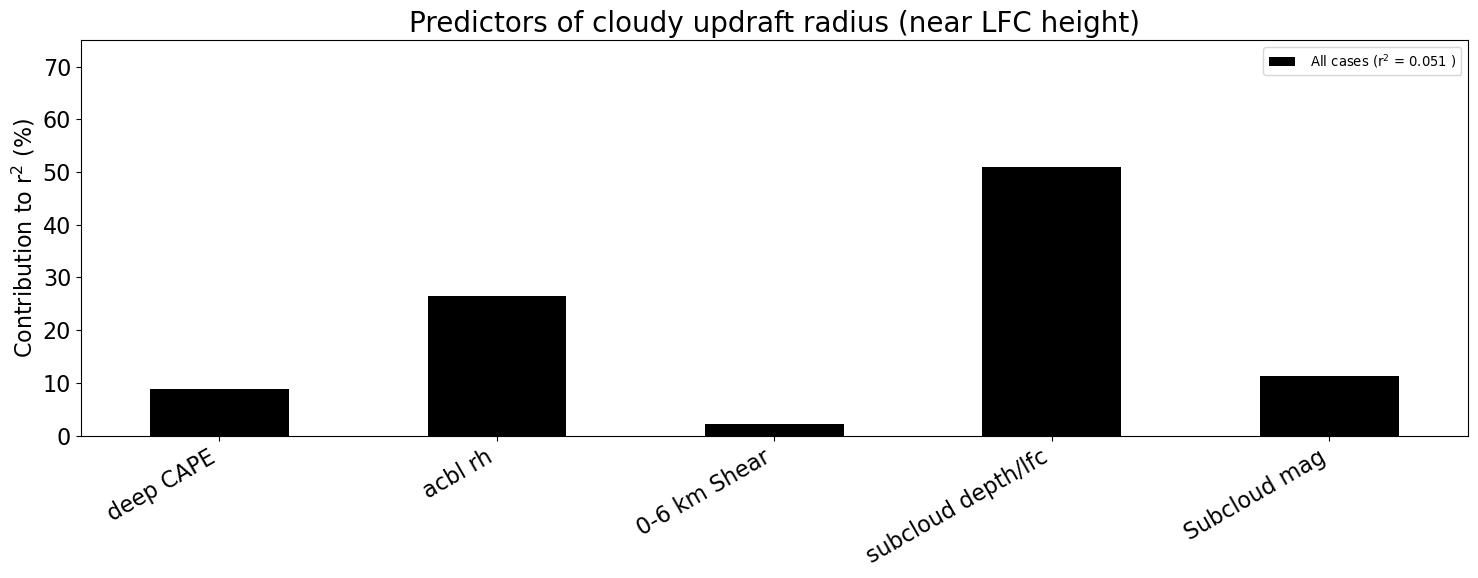

In [16]:
## contributions to cloud radius r^2 at CI locations 15 min before wID

rad_alldays_relimp_perc = rad_alldays_std[['relimp_perc']].to_numpy()[1:].squeeze()
rad_29N_relimp_perc     = rad_29N_std[['relimp_perc']].to_numpy()[1:].squeeze()
rad_04D_relimp_perc     = rad_04D_std[['relimp_perc']].to_numpy()[1:].squeeze()
rad_22J_relimp_perc     = rad_22J_std[['relimp_perc']].to_numpy()[1:].squeeze()
rad_23J_relimp_perc     = rad_23J_std[['relimp_perc']].to_numpy()[1:].squeeze()
rad_25J_relimp_perc     = rad_25J_std[['relimp_perc']].to_numpy()[1:].squeeze()
rad_29J_relimp_perc     = rad_29J_std[['relimp_perc']].to_numpy()[1:].squeeze()
rad_08F_relimp_perc     = rad_08F_std[['relimp_perc']].to_numpy()[1:].squeeze()

#index = ['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']
#index = ['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'subcloud depth/lfc']
#index = ['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width', 'subcloud depth/lfc']
#index = ['acbl CAPE', 'acbl rh', '0-6 km Shear','subcloud depth/lfc']
#index = ['acbl CAPE', 'acbl rh', '0-6 km Shear','Subcloud mag']
index = ['deep CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc', 'Subcloud mag',]

str0 = f" All cases (r$^2$ = {rad_alldays_std.loc[1, 'r2']} )"
str1 = f" 29 Nov (r$^2$ = {rad_29N_std.loc[1, 'r2']} )"
str2 = f" 04 Dec (r$^2$ = {rad_04D_std.loc[1, 'r2']} )"
str3 = f" 22 Jan (r$^2$ = {rad_22J_std.loc[1, 'r2']} )"
str4 = f" 23 Jan (r$^2$ = {rad_23J_std.loc[1, 'r2']} )"
str5 = f" 25 Jan (r$^2$ = {rad_25J_std.loc[1, 'r2']} )"
str6 = f" 29 Jan (r$^2$ = {rad_29J_std.loc[1, 'r2']} )"
str7 = f" 08 Feb (r$^2$ = {rad_08F_std.loc[1, 'r2']} )"

#do it colorized by case:
#df = pd.DataFrame({str0: rad_alldays_relimp_perc, 
#                   str1: rad_29N_relimp_perc, 
#                   str2: rad_04D_relimp_perc, 
#                   str3: rad_22J_relimp_perc,
#                   str4: rad_23J_relimp_perc,
#                   str5: rad_25J_relimp_perc,
#                   str6: rad_29J_relimp_perc,  
#                   str7: rad_08F_relimp_perc}, index=index)


# # black all samples together: 
df = pd.DataFrame({str0: rad_alldays_relimp_perc}, index=index)

#df = pd.DataFrame({'All cases together (r$^2$ = XXX)': wrf_alldays_relimp_perc, 

fig = plt.figure(figsize=(15,6))
#fig = plt.figure(figsize=(7.5,6))

ax1 = fig.add_subplot(1,1,1)

#colorized by case:
#df.plot.bar(ax=ax1, rot=30, fontsize=16, color={str0: "black", 
#                                                str1: "red",
#                                                str2: "green",
#                                                str3: "blue",
#                                                str4: "brown",
#                                                str5: "orange",
#                                                str6: "cyan",
#                                                str7: "purple" })

#black all samples together
df.plot.bar(ax=ax1, rot=30, fontsize=16, color={str0: "black" })

ax1.legend(fontsize=9.5)
ax1.set_ylabel('Contribution to r$^2$ (%)', fontsize=16)
#ax1.set_title('Predictors of Wide Cell Max 10-dBZ ETH', fontsize=20)
ax1.set_title('Predictors of cloudy updraft radius (near LFC height)', fontsize=20)
#ax1.set_title('Predictors of Wide Cell Max Reflectivity', fontsize=20)
ax1.set_ylim(0,75)
plt.xticks(horizontalalignment = 'right')

plt.tight_layout()

plt.savefig('SHAPLEY_Predictors_all_radius.eps', format='eps')
#plt.savefig('Wide_Axis_Cell_Subset_Predictor_Contributions_Max10dBZETH_CIloc-15min.png')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


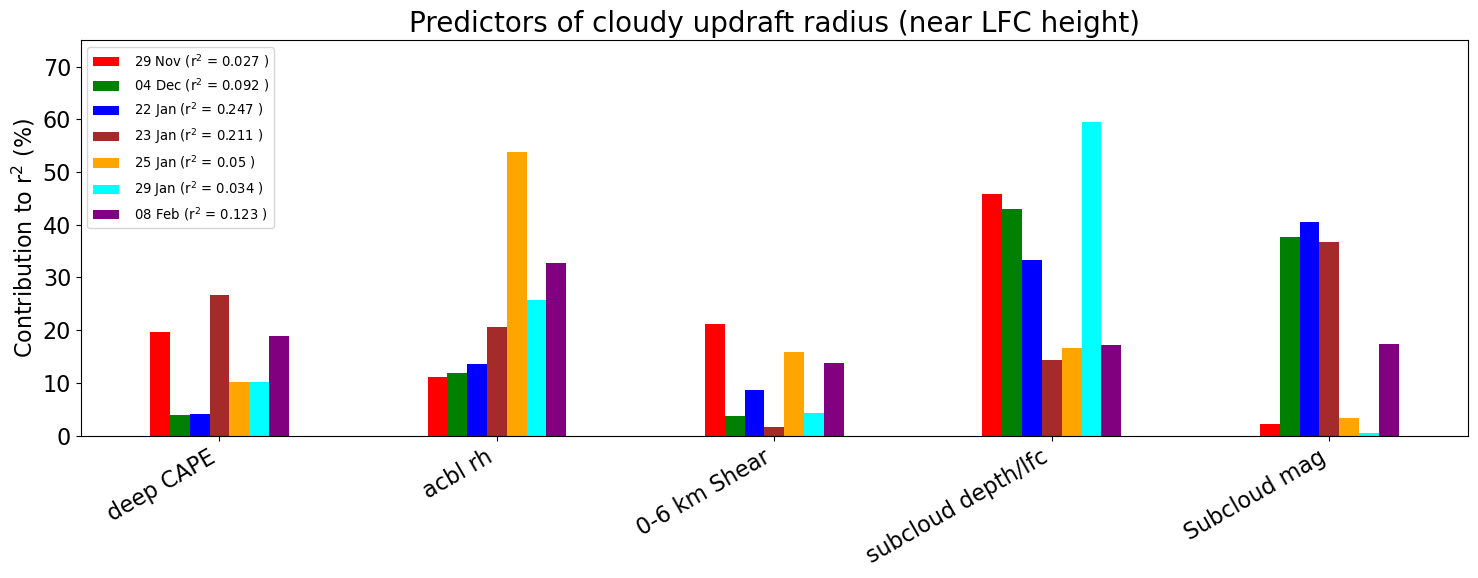

In [17]:
## contributions to r^2 at CI locations 15 min before wID

rad_alldays_relimp_perc = rad_alldays_std[['relimp_perc']].to_numpy()[1:].squeeze()
rad_29N_relimp_perc     = rad_29N_std[['relimp_perc']].to_numpy()[1:].squeeze()
rad_04D_relimp_perc     = rad_04D_std[['relimp_perc']].to_numpy()[1:].squeeze()
rad_22J_relimp_perc     = rad_22J_std[['relimp_perc']].to_numpy()[1:].squeeze()
rad_23J_relimp_perc     = rad_23J_std[['relimp_perc']].to_numpy()[1:].squeeze()
rad_25J_relimp_perc     = rad_25J_std[['relimp_perc']].to_numpy()[1:].squeeze()
rad_29J_relimp_perc     = rad_29J_std[['relimp_perc']].to_numpy()[1:].squeeze()
rad_08F_relimp_perc     = rad_08F_std[['relimp_perc']].to_numpy()[1:].squeeze()

#index = ['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']
#index = ['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'subcloud depth/lfc']
#index = ['acbl CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width', 'subcloud depth/lfc']
#index = ['acbl CAPE', 'acbl rh', '0-6 km Shear','subcloud depth/lfc']
#index = ['acbl CAPE', 'acbl rh', '0-6 km Shear','Subcloud mag']
index = ['deep CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc', 'Subcloud mag',]

#str0 = f" All cases (r$^2$ = {lm_alldays_std.loc[1, 'r2']} )"
str1 = f" 29 Nov (r$^2$ = {rad_29N_std.loc[1, 'r2']} )"
str2 = f" 04 Dec (r$^2$ = {rad_04D_std.loc[1, 'r2']} )"
str3 = f" 22 Jan (r$^2$ = {rad_22J_std.loc[1, 'r2']} )"
str4 = f" 23 Jan (r$^2$ = {rad_23J_std.loc[1, 'r2']} )"
str5 = f" 25 Jan (r$^2$ = {rad_25J_std.loc[1, 'r2']} )"
str6 = f" 29 Jan (r$^2$ = {rad_29J_std.loc[1, 'r2']} )"
str7 = f" 08 Feb (r$^2$ = {rad_08F_std.loc[1, 'r2']} )"

#do it colorized by case:
df = pd.DataFrame({str1: rad_29N_relimp_perc, 
                   str2: rad_04D_relimp_perc, 
                   str3: rad_22J_relimp_perc,
                   str4: rad_23J_relimp_perc,
                   str5: rad_25J_relimp_perc,
                   str6: rad_29J_relimp_perc,  
                   str7: rad_08F_relimp_perc}, index=index)

fig = plt.figure(figsize=(15,6))
#fig = plt.figure(figsize=(7.5,6))

ax1 = fig.add_subplot(1,1,1)

#colorized by case:
df.plot.bar(ax=ax1, rot=30, fontsize=16, color={str1: "red",
                                                str2: "green",
                                                str3: "blue",
                                                str4: "brown",
                                                str5: "orange",
                                                str6: "cyan",
                                                str7: "purple" })

ax1.legend(fontsize=9.5)
ax1.set_ylabel('Contribution to r$^2$ (%)', fontsize=16)
#ax1.set_title('Predictors of Wide Cell Max 10-dBZ ETH', fontsize=20)
ax1.set_title('Predictors of cloudy updraft radius (near LFC height)', fontsize=20)
#ax1.set_title('Predictors of Wide Cell Max Reflectivity', fontsize=20)
ax1.set_ylim(0,75)
plt.xticks(horizontalalignment = 'right')

plt.tight_layout()

plt.savefig('SHAPLEY_Predictors_bycase_radius.eps', format='eps')

In [18]:
######################
######################
######################
######################
######################
######################
######################       now do cloud top ht:
######################
######################
######################
######################
######################
######################
######################
######################

In [19]:
#### now do cloud top ht: 

#index = ['deep CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']
#index = ['deep CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'subcloud depth/lfc']
#index = ['deep CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width', 'subcloud depth/lfc']
index = ['deep CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc', 'Subcloud mag',]

#X = df_alldays_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_alldays_std[index].to_numpy()
Y = df_alldays_std['Cloud topZ'].to_numpy()
top_alldays_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)

#top_alldays_std

print(   ( Y[~np.isnan(Y)] ).shape  )

(5313,)


In [20]:
#X = df_29N_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_29N_std[index].to_numpy()
Y = df_29N_std['Cloud topZ'].to_numpy()
top_29N_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#top_29N_std

print(   ( Y[~np.isnan(Y)] ).shape  )

#X = df_04D_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_04D_std[index].to_numpy()
Y = df_04D_std['Cloud topZ'].to_numpy()
top_04D_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#top_04D_std

print(   ( Y[~np.isnan(Y)] ).shape  )

#X = df_22J_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_22J_std[index].to_numpy()
Y = df_22J_std['Cloud topZ'].to_numpy()
top_22J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#top_22J_std

print(   ( Y[~np.isnan(Y)] ).shape  )

#X = df_23J_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_23J_std[index].to_numpy()
Y = df_23J_std['Cloud topZ'].to_numpy()
top_23J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#top_23J_std

print(   ( Y[~np.isnan(Y)] ).shape  )

#X = df_25J_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_25J_std[index].to_numpy()
Y = df_25J_std['Cloud topZ'].to_numpy()
top_25J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#top_25J_std

print(   ( Y[~np.isnan(Y)] ).shape  )

#X = df_29J_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_29J_std[index].to_numpy()
Y = df_29J_std['Cloud topZ'].to_numpy()
top_29J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#top_29J_std

print(   ( Y[~np.isnan(Y)] ).shape  )

#X = df_08F_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_08F_std[index].to_numpy()
Y = df_08F_std['Cloud topZ'].to_numpy()
top_08F_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#top_08F_std

print(   ( Y[~np.isnan(Y)] ).shape  )

(1078,)
(1012,)
(414,)
(505,)
(226,)
(598,)
(1480,)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


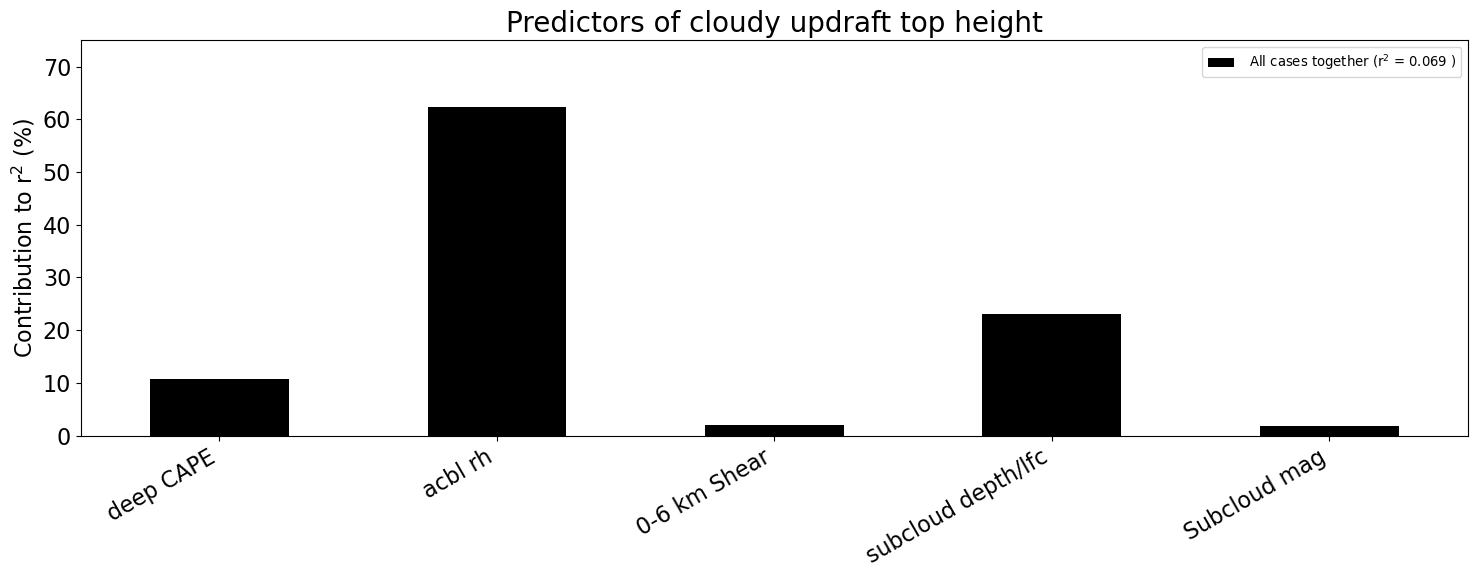

In [21]:
str0 = f" All cases together (r$^2$ = {top_alldays_std.loc[1, 'r2']} )"
str1 = f" 29 Nov (r$^2$ = {top_29N_std.loc[1, 'r2']} )"
str2 = f" 04 Dec (r$^2$ = {top_04D_std.loc[1, 'r2']} )"
str3 = f" 22 Jan (r$^2$ = {top_22J_std.loc[1, 'r2']} )"
str4 = f" 23 Jan (r$^2$ = {top_23J_std.loc[1, 'r2']} )"
str5 = f" 25 Jan (r$^2$ = {top_25J_std.loc[1, 'r2']} )"
str6 = f" 29 Jan (r$^2$ = {top_29J_std.loc[1, 'r2']} )"
str7 = f" 08 Feb (r$^2$ = {top_08F_std.loc[1, 'r2']} )"

#print(str0)
#print(str1)
#print(str2)
#print(str3)
#print(str4)
#print(str5)
#print(str6)
#print(str7)

# JIM's

top_alldays_relimp_perc = top_alldays_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_29N_relimp_perc     = top_29N_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_04D_relimp_perc     = top_04D_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_22J_relimp_perc     = top_22J_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_23J_relimp_perc     = top_23J_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_25J_relimp_perc     = top_25J_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_29J_relimp_perc     = top_29J_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_08F_relimp_perc     = top_08F_std[['relimp_perc']].to_numpy()[1:].squeeze()


#by case:
#df = pd.DataFrame({str0: top_alldays_relimp_perc, 
#                   str1: top_29N_relimp_perc, 
#                   str2: top_04D_relimp_perc, 
#                   str3: top_22J_relimp_perc,
#                   str4: top_23J_relimp_perc,
#                   str5: top_25J_relimp_perc,
#                   str6: top_29J_relimp_perc,  
#                   str7: top_08F_relimp_perc}, index=index)

#all cases together
df = pd.DataFrame({str0: top_alldays_relimp_perc}, index=index)

fig = plt.figure(figsize=(15,6))
#fig = plt.figure(figsize=(7.5,6))

ax1 = fig.add_subplot(1,1,1)
# df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.271)": "orange", "CI location (r$^2$ = 0.355)": "red"})
# df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.503)": "orange", "CI location (r$^2$ = 0.509)": "red"})

#by case:
#df.plot.bar(ax=ax1, rot=30, fontsize=16, color={str0: "black", 
#                                                str1: "red",
#                                                str2: "green",
#                                                str3: "blue",
#                                                str4: "brown",
#                                                str5: "orange",
#                                                str6: "cyan",
#                                                str7: "purple" })

#all cases together
df.plot.bar(ax=ax1, rot=30, fontsize=16, color={str0: "black" })

ax1.legend(fontsize=9.5)
ax1.set_ylabel('Contribution to r$^2$ (%)', fontsize=16)
#ax1.set_title('Predictors of Wide Cell Max 10-dBZ ETH', fontsize=20)
ax1.set_title('Predictors of cloudy updraft top height', fontsize=20)
#ax1.set_title('Predictors of Wide Cell Max Reflectivity', fontsize=20)
ax1.set_ylim(0,75)
plt.xticks(horizontalalignment = 'right')

plt.tight_layout()

plt.savefig('SHAPLEY_Predictors_all_cldtop.eps', format='eps')

In [22]:
#### now do cloud top ht: 

#index = ['deep CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']
#index = ['deep CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'subcloud depth/lfc']
#index = ['deep CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width', 'subcloud depth/lfc']
index = ['deep CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc', 'Subcloud mag',]

#X = df_alldays_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_alldays_std[index].to_numpy()
Y = df_alldays_std['Cloud topZ'].to_numpy()
top_alldays_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#lm_alldays_std

#X = df_29N_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_29N_std[index].to_numpy()
Y = df_29N_std['Cloud topZ'].to_numpy()
top_29N_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#lm_29N_std

#X = df_04D_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_04D_std[index].to_numpy()
Y = df_04D_std['Cloud topZ'].to_numpy()
top_04D_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#lm_04D_std

#X = df_22J_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_22J_std[index].to_numpy()
Y = df_22J_std['Cloud topZ'].to_numpy()
top_22J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#lm_22J_std

#X = df_23J_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_23J_std[index].to_numpy()
Y = df_23J_std['Cloud topZ'].to_numpy()
top_23J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#lm_23J_std

#X = df_25J_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_25J_std[index].to_numpy()
Y = df_25J_std['Cloud topZ'].to_numpy()
top_25J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#lm_25J_std

#X = df_29J_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_29J_std[index].to_numpy()
Y = df_29J_std['Cloud topZ'].to_numpy()
top_29J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#lm_29J_std

#X = df_08F_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_08F_std[index].to_numpy()
Y = df_08F_std['Cloud topZ'].to_numpy()
top_08F_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#top_08F_std

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


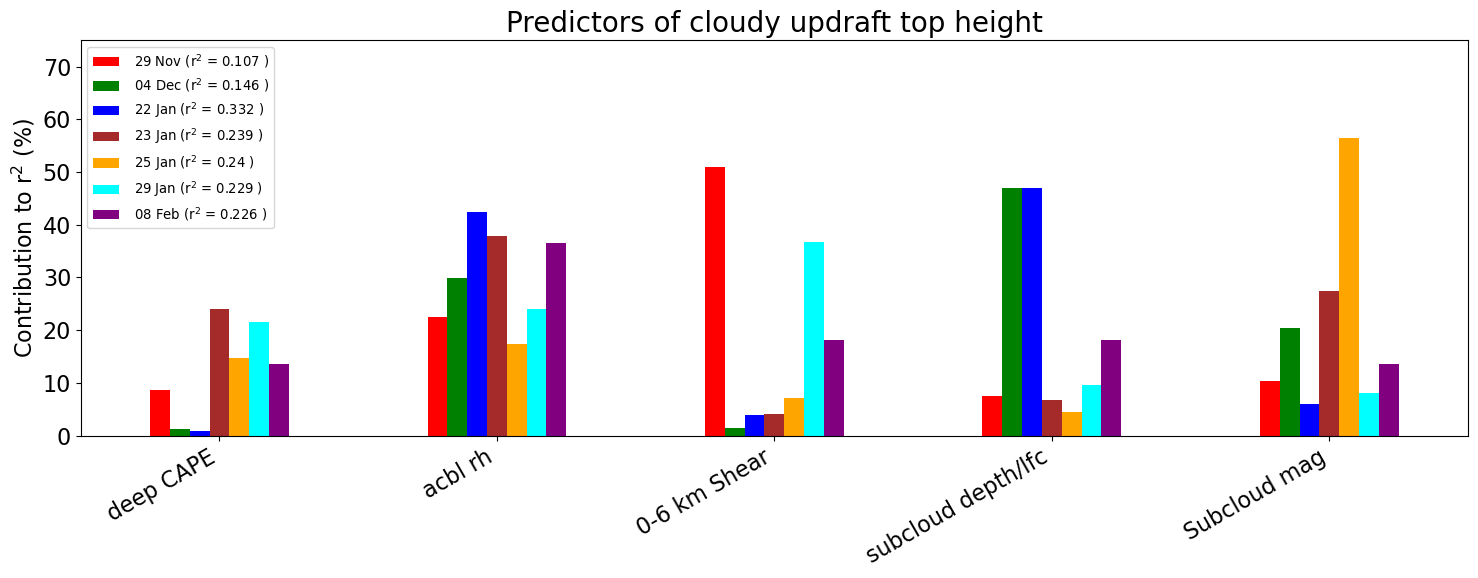

In [23]:
str0 = f" All cases together (r$^2$ = {top_alldays_std.loc[1, 'r2']} )"
str1 = f" 29 Nov (r$^2$ = {top_29N_std.loc[1, 'r2']} )"
str2 = f" 04 Dec (r$^2$ = {top_04D_std.loc[1, 'r2']} )"
str3 = f" 22 Jan (r$^2$ = {top_22J_std.loc[1, 'r2']} )"
str4 = f" 23 Jan (r$^2$ = {top_23J_std.loc[1, 'r2']} )"
str5 = f" 25 Jan (r$^2$ = {top_25J_std.loc[1, 'r2']} )"
str6 = f" 29 Jan (r$^2$ = {top_29J_std.loc[1, 'r2']} )"
str7 = f" 08 Feb (r$^2$ = {top_08F_std.loc[1, 'r2']} )"

#print(str0)
#print(str1)
#print(str2)
#print(str3)
#print(str4)
#print(str5)
#print(str6)
#print(str7)

# JIM's

top_alldays_relimp_perc = top_alldays_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_29N_relimp_perc     = top_29N_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_04D_relimp_perc     = top_04D_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_22J_relimp_perc     = top_22J_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_23J_relimp_perc     = top_23J_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_25J_relimp_perc     = top_25J_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_29J_relimp_perc     = top_29J_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_08F_relimp_perc     = top_08F_std[['relimp_perc']].to_numpy()[1:].squeeze()


#by case:
df = pd.DataFrame({str1: top_29N_relimp_perc, 
                   str2: top_04D_relimp_perc, 
                   str3: top_22J_relimp_perc,
                   str4: top_23J_relimp_perc,
                   str5: top_25J_relimp_perc,
                   str6: top_29J_relimp_perc,  
                   str7: top_08F_relimp_perc}, index=index)

#all cases together
#df = pd.DataFrame({str0: wrf_alldays_relimp_perc}, index=index)

fig = plt.figure(figsize=(15,6))
#fig = plt.figure(figsize=(7.5,6))

ax1 = fig.add_subplot(1,1,1)
# df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.271)": "orange", "CI location (r$^2$ = 0.355)": "red"})
# df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.503)": "orange", "CI location (r$^2$ = 0.509)": "red"})

#by case:
df.plot.bar(ax=ax1, rot=30, fontsize=16, color={str1: "red",
                                                str2: "green",
                                                str3: "blue",
                                                str4: "brown",
                                                str5: "orange",
                                                str6: "cyan",
                                                str7: "purple" })

#all cases together
#df.plot.bar(ax=ax1, rot=30, fontsize=16, color={str0: "black" })

ax1.legend(fontsize=9.5)
ax1.set_ylabel('Contribution to r$^2$ (%)', fontsize=16)
#ax1.set_title('Predictors of Wide Cell Max 10-dBZ ETH', fontsize=20)
ax1.set_title('Predictors of cloudy updraft top height', fontsize=20)
#ax1.set_title('Predictors of Wide Cell Max Reflectivity', fontsize=20)
ax1.set_ylim(0,75)
plt.xticks(horizontalalignment = 'right')

plt.tight_layout()

plt.savefig('SHAPLEY_Predictors_bycase_cldtop.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


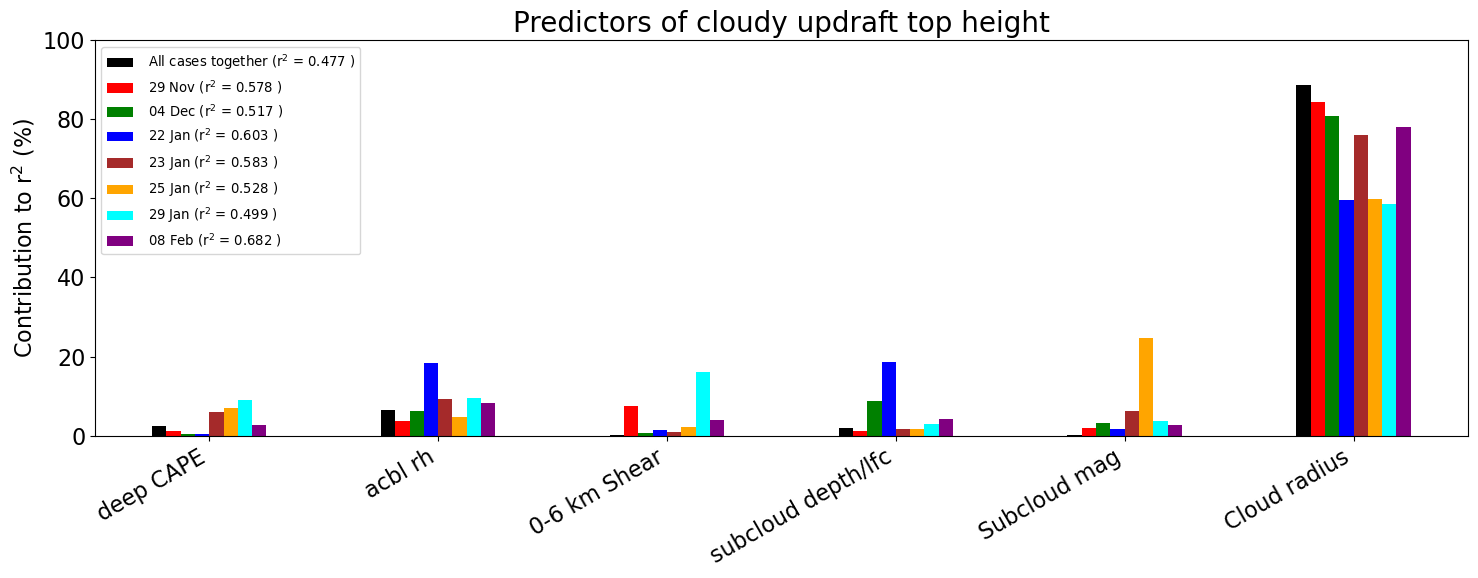

In [32]:
#index = ['deep CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']
#index = ['deep CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud mag', 'subcloud depth/lfc']
#index = ['deep CAPE', 'acbl rh', '0-6 km Shear', 'Subcloud width', 'subcloud depth/lfc']
index = ['deep CAPE', 'acbl rh', '0-6 km Shear', 'subcloud depth/lfc', 'Subcloud mag', 'Cloud radius']

#X = df_alldays_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_alldays_std[index].to_numpy()
Y = df_alldays_std['Cloud topZ'].to_numpy()
top_alldays_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
top_alldays_std

#X = df_29N_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_29N_std[index].to_numpy()
Y = df_29N_std['Cloud topZ'].to_numpy()
top_29N_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#lm_29N_std

#X = df_04D_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_04D_std[index].to_numpy()
Y = df_04D_std['Cloud topZ'].to_numpy()
top_04D_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#lm_04D_std

#X = df_22J_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_22J_std[index].to_numpy()
Y = df_22J_std['Cloud topZ'].to_numpy()
top_22J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#lm_22J_std

#X = df_23J_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_23J_std[index].to_numpy()
Y = df_23J_std['Cloud topZ'].to_numpy()
top_23J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#lm_23J_std

#X = df_25J_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_25J_std[index].to_numpy()
Y = df_25J_std['Cloud topZ'].to_numpy()
top_25J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#lm_25J_std

#X = df_29J_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_29J_std[index].to_numpy()
Y = df_29J_std['Cloud topZ'].to_numpy()
top_29J_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#lm_29J_std

#X = df_08F_std[['deep CAPE', '5km rh', '0-6 km Shear', 'Subcloud mag', 'Subcloud width', 'subcloud depth/lfc']].to_numpy()
X = df_08F_std[index].to_numpy()
Y = df_08F_std['Cloud topZ'].to_numpy()
top_08F_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
#top_08F_std




str0 = f" All cases together (r$^2$ = {top_alldays_std.loc[1, 'r2']} )"
str1 = f" 29 Nov (r$^2$ = {top_29N_std.loc[1, 'r2']} )"
str2 = f" 04 Dec (r$^2$ = {top_04D_std.loc[1, 'r2']} )"
str3 = f" 22 Jan (r$^2$ = {top_22J_std.loc[1, 'r2']} )"
str4 = f" 23 Jan (r$^2$ = {top_23J_std.loc[1, 'r2']} )"
str5 = f" 25 Jan (r$^2$ = {top_25J_std.loc[1, 'r2']} )"
str6 = f" 29 Jan (r$^2$ = {top_29J_std.loc[1, 'r2']} )"
str7 = f" 08 Feb (r$^2$ = {top_08F_std.loc[1, 'r2']} )"

#print(str0)
#print(str1)
#print(str2)
#print(str3)
#print(str4)
#print(str5)
#print(str6)
#print(str7)

# JIM's

top_alldays_relimp_perc = top_alldays_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_29N_relimp_perc     = top_29N_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_04D_relimp_perc     = top_04D_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_22J_relimp_perc     = top_22J_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_23J_relimp_perc     = top_23J_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_25J_relimp_perc     = top_25J_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_29J_relimp_perc     = top_29J_std[['relimp_perc']].to_numpy()[1:].squeeze()
top_08F_relimp_perc     = top_08F_std[['relimp_perc']].to_numpy()[1:].squeeze()


#by case:
df = pd.DataFrame({str0: top_alldays_relimp_perc,
                   str1: top_29N_relimp_perc, 
                   str2: top_04D_relimp_perc, 
                   str3: top_22J_relimp_perc,
                   str4: top_23J_relimp_perc,
                   str5: top_25J_relimp_perc,
                   str6: top_29J_relimp_perc,  
                   str7: top_08F_relimp_perc}, index=index)

#all cases together
#df = pd.DataFrame({str0: wrf_alldays_relimp_perc}, index=index)

fig = plt.figure(figsize=(15,6))
#fig = plt.figure(figsize=(7.5,6))

ax1 = fig.add_subplot(1,1,1)
# df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.271)": "orange", "CI location (r$^2$ = 0.355)": "red"})
# df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.503)": "orange", "CI location (r$^2$ = 0.509)": "red"})

#by case:
df.plot.bar(ax=ax1, rot=30, fontsize=16, color={str0: "black",
                                                str1: "red",
                                                str2: "green",
                                                str3: "blue",
                                                str4: "brown",
                                                str5: "orange",
                                                str6: "cyan",
                                                str7: "purple" })

#all cases together
#df.plot.bar(ax=ax1, rot=30, fontsize=16, color={str0: "black" })

ax1.legend(fontsize=9.5)
ax1.set_ylabel('Contribution to r$^2$ (%)', fontsize=16)
#ax1.set_title('Predictors of Wide Cell Max 10-dBZ ETH', fontsize=20)
ax1.set_title('Predictors of cloudy updraft top height', fontsize=20)
#ax1.set_title('Predictors of Wide Cell Max Reflectivity', fontsize=20)
ax1.set_ylim(0,100)
plt.xticks(horizontalalignment = 'right')

plt.tight_layout()

plt.savefig('SHAPLEY_Predictors_bycase_cldtop_withradius.eps', format='eps')

In [33]:
top_alldays_std

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,-0.005,0.010,-0.488,0.625,0.477,0.476,-0.025,0.015,NaN,NaN
1,x1,-0.134,0.011,-12.733,0.000,0.477,0.476,-0.155,-0.113,0.012,2.494
2,x2,0.136,0.011,11.979,0.000,0.477,0.476,0.113,0.158,0.031,6.491
3,x3,-0.005,0.011,-0.461,0.645,0.477,0.476,-0.027,0.017,0.001,0.226
4,x4,0.006,0.011,0.549,0.583,0.477,0.476,-0.015,0.028,0.009,1.912
5,x5,-0.019,0.010,-1.860,0.063,0.477,0.476,-0.039,0.001,0.001,0.152
6,x6,0.650,0.011,61.583,0.000,0.477,0.476,0.629,0.671,0.423,88.724


In [34]:
top_29N_std

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,0.027,0.020,1.395,0.163,0.578,0.576,-0.011,0.066,NaN,NaN
1,x1,0.046,0.024,1.900,0.058,0.578,0.576,-0.002,0.094,0.007,1.271
2,x2,0.145,0.026,5.566,0.000,0.578,0.576,0.094,0.197,0.022,3.758
3,x3,0.160,0.022,7.439,0.000,0.578,0.576,0.118,0.203,0.043,7.463
4,x4,-0.064,0.024,-2.632,0.009,0.578,0.576,-0.111,-0.016,0.007,1.166
5,x5,-0.074,0.022,-3.314,0.001,0.578,0.576,-0.118,-0.030,0.011,1.928
6,x6,0.707,0.021,33.244,0.000,0.578,0.576,0.666,0.749,0.488,84.414


In [35]:
top_04D_std

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,0.001,0.022,0.055,0.956,0.517,0.514,-0.043,0.045,NaN,NaN
1,x1,0.011,0.025,0.455,0.649,0.517,0.514,-0.038,0.061,0.002,0.307
2,x2,0.153,0.027,5.723,0.000,0.517,0.514,0.100,0.205,0.032,6.187
3,x3,0.062,0.024,2.551,0.011,0.517,0.514,0.014,0.110,0.003,0.669
4,x4,0.101,0.026,3.943,0.000,0.517,0.514,0.051,0.151,0.046,8.859
5,x5,0.072,0.025,2.881,0.004,0.517,0.514,0.023,0.120,0.016,3.059
6,x6,0.637,0.024,27.094,0.000,0.517,0.514,0.591,0.684,0.419,80.918


In [36]:
top_22J_std 

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,0.012,0.031,0.397,0.692,0.603,0.597,-0.049,0.074,NaN,NaN
1,x1,0.004,0.049,0.089,0.930,0.603,0.597,-0.091,0.100,0.002,0.340
2,x2,0.226,0.043,5.223,0.000,0.603,0.597,0.141,0.311,0.111,18.401
3,x3,-0.027,0.049,-0.543,0.587,0.603,0.597,-0.123,0.070,0.009,1.456
4,x4,0.148,0.044,3.364,0.001,0.603,0.597,0.062,0.235,0.113,18.660
5,x5,-0.029,0.040,-0.725,0.469,0.603,0.597,-0.109,0.050,0.010,1.652
6,x6,0.558,0.035,15.752,0.000,0.603,0.597,0.488,0.627,0.359,59.490


In [37]:
top_23J_std 

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,0.006,0.030,0.187,0.852,0.583,0.577,-0.053,0.064,NaN,NaN
1,x1,0.094,0.038,2.439,0.015,0.583,0.577,0.018,0.169,0.035,6.001
2,x2,0.177,0.033,5.385,0.000,0.583,0.577,0.112,0.241,0.054,9.193
3,x3,0.098,0.036,2.743,0.006,0.583,0.577,0.028,0.169,0.006,0.957
4,x4,-0.010,0.032,-0.304,0.761,0.583,0.577,-0.072,0.053,0.010,1.684
5,x5,0.071,0.033,2.119,0.035,0.583,0.577,0.005,0.136,0.036,6.236
6,x6,0.640,0.035,18.326,0.000,0.583,0.577,0.571,0.708,0.443,75.929


In [38]:
top_25J_std 

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,-0.004,0.049,-0.079,0.937,0.528,0.513,-0.100,0.092,NaN,NaN
1,x1,0.009,0.099,0.093,0.926,0.528,0.513,-0.185,0.203,0.037,7.038
2,x2,0.236,0.079,3.006,0.003,0.528,0.513,0.081,0.391,0.025,4.743
3,x3,-0.168,0.095,-1.783,0.076,0.528,0.513,-0.355,0.018,0.012,2.190
4,x4,-0.017,0.051,-0.332,0.740,0.528,0.513,-0.117,0.083,0.008,1.599
5,x5,-0.422,0.075,-5.617,0.000,0.528,0.513,-0.570,-0.274,0.130,24.629
6,x6,0.539,0.050,10.822,0.000,0.528,0.513,0.440,0.637,0.316,59.801


In [39]:
top_29J_std 

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,-0.018,0.030,-0.587,0.558,0.499,0.493,-0.077,0.041,NaN,NaN
1,x1,0.129,0.044,2.928,0.004,0.499,0.493,0.043,0.216,0.045,9.090
2,x2,0.104,0.043,2.404,0.017,0.499,0.493,0.019,0.189,0.048,9.584
3,x3,0.231,0.037,6.199,0.000,0.499,0.493,0.158,0.304,0.080,16.097
4,x4,0.047,0.031,1.508,0.132,0.499,0.493,-0.014,0.108,0.015,2.982
5,x5,-0.081,0.034,-2.377,0.018,0.499,0.493,-0.148,-0.014,0.018,3.629
6,x6,0.525,0.032,16.430,0.000,0.499,0.493,0.462,0.588,0.292,58.619


In [40]:
top_08F_std 

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,-0.008,0.015,-0.558,0.577,0.682,0.681,-0.037,0.020,NaN,NaN
1,x1,0.053,0.017,3.079,0.002,0.682,0.681,0.019,0.086,0.019,2.792
2,x2,0.118,0.017,6.889,0.000,0.682,0.681,0.084,0.152,0.057,8.286
3,x3,0.103,0.016,6.423,0.000,0.682,0.681,0.071,0.134,0.027,3.909
4,x4,0.061,0.017,3.652,0.000,0.682,0.681,0.028,0.094,0.029,4.286
5,x5,0.058,0.015,3.865,0.000,0.682,0.681,0.029,0.088,0.018,2.672
6,x6,0.708,0.016,45.038,0.000,0.682,0.681,0.677,0.738,0.532,78.055


In [ ]:
#plot standardized coeffs for cloud radius

#print(type(rad_08F_std))
blah = rad_08F_std.to_numpy()
print(blah)

[['Intercept' 0.008 0.025 0.341 0.733 0.123 0.12 -0.04 0.057 nan nan]
 ['x1' 0.146 0.029 5.105 0.0 0.123 0.12 0.09 0.202 0.023 18.82]
 ['x2' 0.16 0.029 5.564 0.0 0.123 0.12 0.103 0.216 0.04 32.714]
 ['x3' 0.127 0.027 4.728 0.0 0.123 0.12 0.074 0.18 0.017 13.771]
 ['x4' 0.085 0.028 3.014 0.003 0.123 0.12 0.03 0.14 0.021 17.248]
 ['x5' 0.139 0.025 5.507 0.0 0.123 0.12 0.09 0.189 0.022 17.447]]


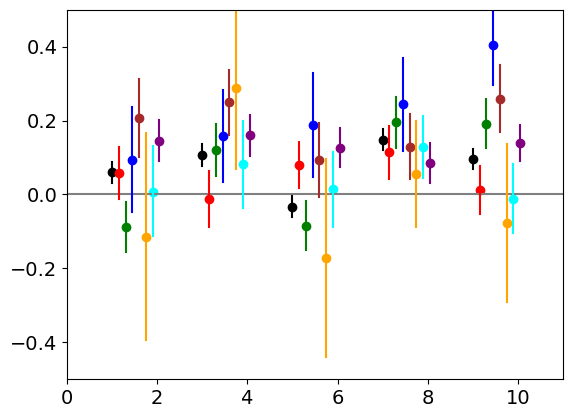

In [94]:
x1sc_rad_all = [  rad_alldays_std.to_numpy()[1,7],rad_alldays_std.to_numpy()[1,1],rad_alldays_std.to_numpy()[1,8]    ]
x2sc_rad_all = [  rad_alldays_std.to_numpy()[2,7],rad_alldays_std.to_numpy()[2,1],rad_alldays_std.to_numpy()[2,8]    ]
x3sc_rad_all = [  rad_alldays_std.to_numpy()[3,7],rad_alldays_std.to_numpy()[3,1],rad_alldays_std.to_numpy()[3,8]    ]
x4sc_rad_all = [  rad_alldays_std.to_numpy()[4,7],rad_alldays_std.to_numpy()[4,1],rad_alldays_std.to_numpy()[4,8]    ]
x5sc_rad_all = [  rad_alldays_std.to_numpy()[5,7],rad_alldays_std.to_numpy()[5,1],rad_alldays_std.to_numpy()[5,8]    ]

x1sc_rad_29N = [  rad_29N_std.to_numpy()[1,7],rad_29N_std.to_numpy()[1,1],rad_29N_std.to_numpy()[1,8]    ]
x2sc_rad_29N = [  rad_29N_std.to_numpy()[2,7],rad_29N_std.to_numpy()[2,1],rad_29N_std.to_numpy()[2,8]    ]
x3sc_rad_29N = [  rad_29N_std.to_numpy()[3,7],rad_29N_std.to_numpy()[3,1],rad_29N_std.to_numpy()[3,8]    ]
x4sc_rad_29N = [  rad_29N_std.to_numpy()[4,7],rad_29N_std.to_numpy()[4,1],rad_29N_std.to_numpy()[4,8]    ]
x5sc_rad_29N = [  rad_29N_std.to_numpy()[5,7],rad_29N_std.to_numpy()[5,1],rad_29N_std.to_numpy()[5,8]    ]
x1sc_rad_04D = [  rad_04D_std.to_numpy()[1,7],rad_04D_std.to_numpy()[1,1],rad_04D_std.to_numpy()[1,8]    ]
x2sc_rad_04D = [  rad_04D_std.to_numpy()[2,7],rad_04D_std.to_numpy()[2,1],rad_04D_std.to_numpy()[2,8]    ]
x3sc_rad_04D = [  rad_04D_std.to_numpy()[3,7],rad_04D_std.to_numpy()[3,1],rad_04D_std.to_numpy()[3,8]    ]
x4sc_rad_04D = [  rad_04D_std.to_numpy()[4,7],rad_04D_std.to_numpy()[4,1],rad_04D_std.to_numpy()[4,8]    ]
x5sc_rad_04D = [  rad_04D_std.to_numpy()[5,7],rad_04D_std.to_numpy()[5,1],rad_04D_std.to_numpy()[5,8]    ]
x1sc_rad_22J = [  rad_22J_std.to_numpy()[1,7],rad_22J_std.to_numpy()[1,1],rad_22J_std.to_numpy()[1,8]    ]
x2sc_rad_22J = [  rad_22J_std.to_numpy()[2,7],rad_22J_std.to_numpy()[2,1],rad_22J_std.to_numpy()[2,8]    ]
x3sc_rad_22J = [  rad_22J_std.to_numpy()[3,7],rad_22J_std.to_numpy()[3,1],rad_22J_std.to_numpy()[3,8]    ]
x4sc_rad_22J = [  rad_22J_std.to_numpy()[4,7],rad_22J_std.to_numpy()[4,1],rad_22J_std.to_numpy()[4,8]    ]
x5sc_rad_22J = [  rad_22J_std.to_numpy()[5,7],rad_22J_std.to_numpy()[5,1],rad_22J_std.to_numpy()[5,8]    ]
x1sc_rad_23J = [  rad_23J_std.to_numpy()[1,7],rad_23J_std.to_numpy()[1,1],rad_23J_std.to_numpy()[1,8]    ]
x2sc_rad_23J = [  rad_23J_std.to_numpy()[2,7],rad_23J_std.to_numpy()[2,1],rad_23J_std.to_numpy()[2,8]    ]
x3sc_rad_23J = [  rad_23J_std.to_numpy()[3,7],rad_23J_std.to_numpy()[3,1],rad_23J_std.to_numpy()[3,8]    ]
x4sc_rad_23J = [  rad_23J_std.to_numpy()[4,7],rad_23J_std.to_numpy()[4,1],rad_23J_std.to_numpy()[4,8]    ]
x5sc_rad_23J = [  rad_23J_std.to_numpy()[5,7],rad_23J_std.to_numpy()[5,1],rad_23J_std.to_numpy()[5,8]    ]
x1sc_rad_25J = [  rad_25J_std.to_numpy()[1,7],rad_25J_std.to_numpy()[1,1],rad_25J_std.to_numpy()[1,8]    ]
x2sc_rad_25J = [  rad_25J_std.to_numpy()[2,7],rad_25J_std.to_numpy()[2,1],rad_25J_std.to_numpy()[2,8]    ]
x3sc_rad_25J = [  rad_25J_std.to_numpy()[3,7],rad_25J_std.to_numpy()[3,1],rad_25J_std.to_numpy()[3,8]    ]
x4sc_rad_25J = [  rad_25J_std.to_numpy()[4,7],rad_25J_std.to_numpy()[4,1],rad_25J_std.to_numpy()[4,8]    ]
x5sc_rad_25J = [  rad_25J_std.to_numpy()[5,7],rad_25J_std.to_numpy()[5,1],rad_25J_std.to_numpy()[5,8]    ]
x1sc_rad_29J = [  rad_29J_std.to_numpy()[1,7],rad_29J_std.to_numpy()[1,1],rad_29J_std.to_numpy()[1,8]    ]
x2sc_rad_29J = [  rad_29J_std.to_numpy()[2,7],rad_29J_std.to_numpy()[2,1],rad_29J_std.to_numpy()[2,8]    ]
x3sc_rad_29J = [  rad_29J_std.to_numpy()[3,7],rad_29J_std.to_numpy()[3,1],rad_29J_std.to_numpy()[3,8]    ]
x4sc_rad_29J = [  rad_29J_std.to_numpy()[4,7],rad_29J_std.to_numpy()[4,1],rad_29J_std.to_numpy()[4,8]    ]
x5sc_rad_29J = [  rad_29J_std.to_numpy()[5,7],rad_29J_std.to_numpy()[5,1],rad_29J_std.to_numpy()[5,8]    ]
x1sc_rad_8F = [  rad_08F_std.to_numpy()[1,7],rad_08F_std.to_numpy()[1,1],rad_08F_std.to_numpy()[1,8]    ]
x2sc_rad_8F = [  rad_08F_std.to_numpy()[2,7],rad_08F_std.to_numpy()[2,1],rad_08F_std.to_numpy()[2,8]    ]
x3sc_rad_8F = [  rad_08F_std.to_numpy()[3,7],rad_08F_std.to_numpy()[3,1],rad_08F_std.to_numpy()[3,8]    ]
x4sc_rad_8F = [  rad_08F_std.to_numpy()[4,7],rad_08F_std.to_numpy()[4,1],rad_08F_std.to_numpy()[4,8]    ]
x5sc_rad_8F = [  rad_08F_std.to_numpy()[5,7],rad_08F_std.to_numpy()[5,1],rad_08F_std.to_numpy()[5,8]    ]


plt.plot([0,11],[0,0],color="gray")
plt.axis([ 0, 11, -0.5, 0.5])

shift = 0.0
plt.scatter([1+shift],x1sc_rad_all[1],facecolors="black")
plt.scatter([3+shift],x2sc_rad_all[1],facecolors="black")
plt.scatter([5+shift],x3sc_rad_all[1],facecolors="black")
plt.scatter([7+shift],x4sc_rad_all[1],facecolors="black")
plt.scatter([9+shift],x5sc_rad_all[1],facecolors="black")
plt.plot([1+shift,1+shift,1+shift],x1sc_rad_all,color="black")
plt.plot([3+shift,3+shift,3+shift],x2sc_rad_all,color="black")
plt.plot([5+shift,5+shift,5+shift],x3sc_rad_all,color="black")
plt.plot([7+shift,7+shift,7+shift],x4sc_rad_all,color="black")
plt.plot([9+shift,9+shift,9+shift],x5sc_rad_all,color="black")


shift = 0.15
plt.scatter([1.+shift],x1sc_rad_29N[1],facecolors="red")
plt.scatter([3+shift],x2sc_rad_29N[1],facecolors="red")
plt.scatter([5+shift],x3sc_rad_29N[1],facecolors="red")
plt.scatter([7+shift],x4sc_rad_29N[1],facecolors="red")
plt.scatter([9+shift],x5sc_rad_29N[1],facecolors="red")
plt.plot([1+shift,1+shift,1+shift],x1sc_rad_29N,color="red")
plt.plot([3+shift,3+shift,3+shift],x2sc_rad_29N,color="red")
plt.plot([5+shift,5+shift,5+shift],x3sc_rad_29N,color="red")
plt.plot([7+shift,7+shift,7+shift],x4sc_rad_29N,color="red")
plt.plot([9+shift,9+shift,9+shift],x5sc_rad_29N,color="red")


shift = 0.3
plt.scatter([1+shift],x1sc_rad_04D[1],facecolors="green")
plt.scatter([3+shift],x2sc_rad_04D[1],facecolors="green")
plt.scatter([5+shift],x3sc_rad_04D[1],facecolors="green")
plt.scatter([7+shift],x4sc_rad_04D[1],facecolors="green")
plt.scatter([9+shift],x5sc_rad_04D[1],facecolors="green")
plt.plot([1+shift,1+shift,1+shift],x1sc_rad_04D,color="green")
plt.plot([3+shift,3+shift,3+shift],x2sc_rad_04D,color="green")
plt.plot([5+shift,5+shift,5+shift],x3sc_rad_04D,color="green")
plt.plot([7+shift,7+shift,7+shift],x4sc_rad_04D,color="green")
plt.plot([9+shift,9+shift,9+shift],x5sc_rad_04D,color="green")


shift = 0.45
plt.scatter([1+shift],x1sc_rad_22J[1],facecolors="blue")
plt.scatter([3+shift],x2sc_rad_22J[1],facecolors="blue")
plt.scatter([5+shift],x3sc_rad_22J[1],facecolors="blue")
plt.scatter([7+shift],x4sc_rad_22J[1],facecolors="blue")
plt.scatter([9+shift],x5sc_rad_22J[1],facecolors="blue")
plt.plot([1+shift,1+shift,1+shift],x1sc_rad_22J,color="blue")
plt.plot([3+shift,3+shift,3+shift],x2sc_rad_22J,color="blue")
plt.plot([5+shift,5+shift,5+shift],x3sc_rad_22J,color="blue")
plt.plot([7+shift,7+shift,7+shift],x4sc_rad_22J,color="blue")
plt.plot([9+shift,9+shift,9+shift],x5sc_rad_22J,color="blue")

shift = 0.6
plt.scatter([1+shift],x1sc_rad_23J[1],facecolors="brown")
plt.scatter([3+shift],x2sc_rad_23J[1],facecolors="brown")
plt.scatter([5+shift],x3sc_rad_23J[1],facecolors="brown")
plt.scatter([7+shift],x4sc_rad_23J[1],facecolors="brown")
plt.scatter([9+shift],x5sc_rad_23J[1],facecolors="brown")
plt.plot([1+shift,1+shift,1+shift],x1sc_rad_23J,color="brown")
plt.plot([3+shift,3+shift,3+shift],x2sc_rad_23J,color="brown")
plt.plot([5+shift,5+shift,5+shift],x3sc_rad_23J,color="brown")
plt.plot([7+shift,7+shift,7+shift],x4sc_rad_23J,color="brown")
plt.plot([9+shift,9+shift,9+shift],x5sc_rad_23J,color="brown")

shift = 0.75
plt.scatter([1+shift],x1sc_rad_25J[1],facecolors="orange")
plt.scatter([3+shift],x2sc_rad_25J[1],facecolors="orange")
plt.scatter([5+shift],x3sc_rad_25J[1],facecolors="orange")
plt.scatter([7+shift],x4sc_rad_25J[1],facecolors="orange")
plt.scatter([9+shift],x5sc_rad_25J[1],facecolors="orange")
plt.plot([1+shift,1+shift,1+shift],x1sc_rad_25J,color="orange")
plt.plot([3+shift,3+shift,3+shift],x2sc_rad_25J,color="orange")
plt.plot([5+shift,5+shift,5+shift],x3sc_rad_25J,color="orange")
plt.plot([7+shift,7+shift,7+shift],x4sc_rad_25J,color="orange")
plt.plot([9+shift,9+shift,9+shift],x5sc_rad_25J,color="orange")

shift = 0.9
plt.scatter([1+shift],x1sc_rad_29J[1],facecolors="cyan")
plt.scatter([3+shift],x2sc_rad_29J[1],facecolors="cyan")
plt.scatter([5+shift],x3sc_rad_29J[1],facecolors="cyan")
plt.scatter([7+shift],x4sc_rad_29J[1],facecolors="cyan")
plt.scatter([9+shift],x5sc_rad_29J[1],facecolors="cyan")
plt.plot([1+shift,1+shift,1+shift],x1sc_rad_29J,color="cyan")
plt.plot([3+shift,3+shift,3+shift],x2sc_rad_29J,color="cyan")
plt.plot([5+shift,5+shift,5+shift],x3sc_rad_29J,color="cyan")
plt.plot([7+shift,7+shift,7+shift],x4sc_rad_29J,color="cyan")
plt.plot([9+shift,9+shift,9+shift],x5sc_rad_29J,color="cyan")

shift = 1.05
plt.scatter([1+shift],x1sc_rad_8F[1],facecolors="purple")
plt.scatter([3+shift],x2sc_rad_8F[1],facecolors="purple")
plt.scatter([5+shift],x3sc_rad_8F[1],facecolors="purple")
plt.scatter([7+shift],x4sc_rad_8F[1],facecolors="purple")
plt.scatter([9+shift],x5sc_rad_8F[1],facecolors="purple")
plt.plot([1+shift,1+shift,1+shift],x1sc_rad_8F,color="purple")
plt.plot([3+shift,3+shift,3+shift],x2sc_rad_8F,color="purple")
plt.plot([5+shift,5+shift,5+shift],x3sc_rad_8F,color="purple")
plt.plot([7+shift,7+shift,7+shift],x4sc_rad_8F,color="purple")
plt.plot([9+shift,9+shift,9+shift],x5sc_rad_8F,color="purple")


plt.savefig('StandCoeff_bycase_cldrad.eps', format='eps')

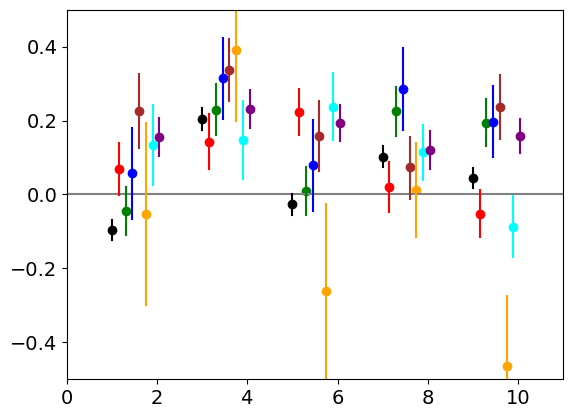

In [95]:
x1sc_top_all = [  top_alldays_std.to_numpy()[1,7],top_alldays_std.to_numpy()[1,1],top_alldays_std.to_numpy()[1,8]    ]
x2sc_top_all = [  top_alldays_std.to_numpy()[2,7],top_alldays_std.to_numpy()[2,1],top_alldays_std.to_numpy()[2,8]    ]
x3sc_top_all = [  top_alldays_std.to_numpy()[3,7],top_alldays_std.to_numpy()[3,1],top_alldays_std.to_numpy()[3,8]    ]
x4sc_top_all = [  top_alldays_std.to_numpy()[4,7],top_alldays_std.to_numpy()[4,1],top_alldays_std.to_numpy()[4,8]    ]
x5sc_top_all = [  top_alldays_std.to_numpy()[5,7],top_alldays_std.to_numpy()[5,1],top_alldays_std.to_numpy()[5,8]    ]

x1sc_top_29N = [  top_29N_std.to_numpy()[1,7],top_29N_std.to_numpy()[1,1],top_29N_std.to_numpy()[1,8]    ]
x2sc_top_29N = [  top_29N_std.to_numpy()[2,7],top_29N_std.to_numpy()[2,1],top_29N_std.to_numpy()[2,8]    ]
x3sc_top_29N = [  top_29N_std.to_numpy()[3,7],top_29N_std.to_numpy()[3,1],top_29N_std.to_numpy()[3,8]    ]
x4sc_top_29N = [  top_29N_std.to_numpy()[4,7],top_29N_std.to_numpy()[4,1],top_29N_std.to_numpy()[4,8]    ]
x5sc_top_29N = [  top_29N_std.to_numpy()[5,7],top_29N_std.to_numpy()[5,1],top_29N_std.to_numpy()[5,8]    ]
x1sc_top_04D = [  top_04D_std.to_numpy()[1,7],top_04D_std.to_numpy()[1,1],top_04D_std.to_numpy()[1,8]    ]
x2sc_top_04D = [  top_04D_std.to_numpy()[2,7],top_04D_std.to_numpy()[2,1],top_04D_std.to_numpy()[2,8]    ]
x3sc_top_04D = [  top_04D_std.to_numpy()[3,7],top_04D_std.to_numpy()[3,1],top_04D_std.to_numpy()[3,8]    ]
x4sc_top_04D = [  top_04D_std.to_numpy()[4,7],top_04D_std.to_numpy()[4,1],top_04D_std.to_numpy()[4,8]    ]
x5sc_top_04D = [  top_04D_std.to_numpy()[5,7],top_04D_std.to_numpy()[5,1],top_04D_std.to_numpy()[5,8]    ]
x1sc_top_22J = [  top_22J_std.to_numpy()[1,7],top_22J_std.to_numpy()[1,1],top_22J_std.to_numpy()[1,8]    ]
x2sc_top_22J = [  top_22J_std.to_numpy()[2,7],top_22J_std.to_numpy()[2,1],top_22J_std.to_numpy()[2,8]    ]
x3sc_top_22J = [  top_22J_std.to_numpy()[3,7],top_22J_std.to_numpy()[3,1],top_22J_std.to_numpy()[3,8]    ]
x4sc_top_22J = [  top_22J_std.to_numpy()[4,7],top_22J_std.to_numpy()[4,1],top_22J_std.to_numpy()[4,8]    ]
x5sc_top_22J = [  top_22J_std.to_numpy()[5,7],top_22J_std.to_numpy()[5,1],top_22J_std.to_numpy()[5,8]    ]
x1sc_top_23J = [  top_23J_std.to_numpy()[1,7],top_23J_std.to_numpy()[1,1],top_23J_std.to_numpy()[1,8]    ]
x2sc_top_23J = [  top_23J_std.to_numpy()[2,7],top_23J_std.to_numpy()[2,1],top_23J_std.to_numpy()[2,8]    ]
x3sc_top_23J = [  top_23J_std.to_numpy()[3,7],top_23J_std.to_numpy()[3,1],top_23J_std.to_numpy()[3,8]    ]
x4sc_top_23J = [  top_23J_std.to_numpy()[4,7],top_23J_std.to_numpy()[4,1],top_23J_std.to_numpy()[4,8]    ]
x5sc_top_23J = [  top_23J_std.to_numpy()[5,7],top_23J_std.to_numpy()[5,1],top_23J_std.to_numpy()[5,8]    ]
x1sc_top_25J = [  top_25J_std.to_numpy()[1,7],top_25J_std.to_numpy()[1,1],top_25J_std.to_numpy()[1,8]    ]
x2sc_top_25J = [  top_25J_std.to_numpy()[2,7],top_25J_std.to_numpy()[2,1],top_25J_std.to_numpy()[2,8]    ]
x3sc_top_25J = [  top_25J_std.to_numpy()[3,7],top_25J_std.to_numpy()[3,1],top_25J_std.to_numpy()[3,8]    ]
x4sc_top_25J = [  top_25J_std.to_numpy()[4,7],top_25J_std.to_numpy()[4,1],top_25J_std.to_numpy()[4,8]    ]
x5sc_top_25J = [  top_25J_std.to_numpy()[5,7],top_25J_std.to_numpy()[5,1],top_25J_std.to_numpy()[5,8]    ]
x1sc_top_29J = [  top_29J_std.to_numpy()[1,7],top_29J_std.to_numpy()[1,1],top_29J_std.to_numpy()[1,8]    ]
x2sc_top_29J = [  top_29J_std.to_numpy()[2,7],top_29J_std.to_numpy()[2,1],top_29J_std.to_numpy()[2,8]    ]
x3sc_top_29J = [  top_29J_std.to_numpy()[3,7],top_29J_std.to_numpy()[3,1],top_29J_std.to_numpy()[3,8]    ]
x4sc_top_29J = [  top_29J_std.to_numpy()[4,7],top_29J_std.to_numpy()[4,1],top_29J_std.to_numpy()[4,8]    ]
x5sc_top_29J = [  top_29J_std.to_numpy()[5,7],top_29J_std.to_numpy()[5,1],top_29J_std.to_numpy()[5,8]    ]
x1sc_top_8F = [  top_08F_std.to_numpy()[1,7],top_08F_std.to_numpy()[1,1],top_08F_std.to_numpy()[1,8]    ]
x2sc_top_8F = [  top_08F_std.to_numpy()[2,7],top_08F_std.to_numpy()[2,1],top_08F_std.to_numpy()[2,8]    ]
x3sc_top_8F = [  top_08F_std.to_numpy()[3,7],top_08F_std.to_numpy()[3,1],top_08F_std.to_numpy()[3,8]    ]
x4sc_top_8F = [  top_08F_std.to_numpy()[4,7],top_08F_std.to_numpy()[4,1],top_08F_std.to_numpy()[4,8]    ]
x5sc_top_8F = [  top_08F_std.to_numpy()[5,7],top_08F_std.to_numpy()[5,1],top_08F_std.to_numpy()[5,8]    ]


plt.plot([0,11],[0,0],color="gray")
plt.axis([ 0, 11, -0.5, 0.5])

shift = 0.0
plt.scatter([1+shift],x1sc_top_all[1],facecolors="black")
plt.scatter([3+shift],x2sc_top_all[1],facecolors="black")
plt.scatter([5+shift],x3sc_top_all[1],facecolors="black")
plt.scatter([7+shift],x4sc_top_all[1],facecolors="black")
plt.scatter([9+shift],x5sc_top_all[1],facecolors="black")
plt.plot([1+shift,1+shift,1+shift],x1sc_top_all,color="black")
plt.plot([3+shift,3+shift,3+shift],x2sc_top_all,color="black")
plt.plot([5+shift,5+shift,5+shift],x3sc_top_all,color="black")
plt.plot([7+shift,7+shift,7+shift],x4sc_top_all,color="black")
plt.plot([9+shift,9+shift,9+shift],x5sc_top_all,color="black")


shift = 0.15
plt.scatter([1.+shift],x1sc_top_29N[1],facecolors="red")
plt.scatter([3+shift],x2sc_top_29N[1],facecolors="red")
plt.scatter([5+shift],x3sc_top_29N[1],facecolors="red")
plt.scatter([7+shift],x4sc_top_29N[1],facecolors="red")
plt.scatter([9+shift],x5sc_top_29N[1],facecolors="red")
plt.plot([1+shift,1+shift,1+shift],x1sc_top_29N,color="red")
plt.plot([3+shift,3+shift,3+shift],x2sc_top_29N,color="red")
plt.plot([5+shift,5+shift,5+shift],x3sc_top_29N,color="red")
plt.plot([7+shift,7+shift,7+shift],x4sc_top_29N,color="red")
plt.plot([9+shift,9+shift,9+shift],x5sc_top_29N,color="red")


shift = 0.3
plt.scatter([1+shift],x1sc_top_04D[1],facecolors="green")
plt.scatter([3+shift],x2sc_top_04D[1],facecolors="green")
plt.scatter([5+shift],x3sc_top_04D[1],facecolors="green")
plt.scatter([7+shift],x4sc_top_04D[1],facecolors="green")
plt.scatter([9+shift],x5sc_top_04D[1],facecolors="green")
plt.plot([1+shift,1+shift,1+shift],x1sc_top_04D,color="green")
plt.plot([3+shift,3+shift,3+shift],x2sc_top_04D,color="green")
plt.plot([5+shift,5+shift,5+shift],x3sc_top_04D,color="green")
plt.plot([7+shift,7+shift,7+shift],x4sc_top_04D,color="green")
plt.plot([9+shift,9+shift,9+shift],x5sc_top_04D,color="green")


shift = 0.45
plt.scatter([1+shift],x1sc_top_22J[1],facecolors="blue")
plt.scatter([3+shift],x2sc_top_22J[1],facecolors="blue")
plt.scatter([5+shift],x3sc_top_22J[1],facecolors="blue")
plt.scatter([7+shift],x4sc_top_22J[1],facecolors="blue")
plt.scatter([9+shift],x5sc_top_22J[1],facecolors="blue")
plt.plot([1+shift,1+shift,1+shift],x1sc_top_22J,color="blue")
plt.plot([3+shift,3+shift,3+shift],x2sc_top_22J,color="blue")
plt.plot([5+shift,5+shift,5+shift],x3sc_top_22J,color="blue")
plt.plot([7+shift,7+shift,7+shift],x4sc_top_22J,color="blue")
plt.plot([9+shift,9+shift,9+shift],x5sc_top_22J,color="blue")

shift = 0.6
plt.scatter([1+shift],x1sc_top_23J[1],facecolors="brown")
plt.scatter([3+shift],x2sc_top_23J[1],facecolors="brown")
plt.scatter([5+shift],x3sc_top_23J[1],facecolors="brown")
plt.scatter([7+shift],x4sc_top_23J[1],facecolors="brown")
plt.scatter([9+shift],x5sc_top_23J[1],facecolors="brown")
plt.plot([1+shift,1+shift,1+shift],x1sc_top_23J,color="brown")
plt.plot([3+shift,3+shift,3+shift],x2sc_top_23J,color="brown")
plt.plot([5+shift,5+shift,5+shift],x3sc_top_23J,color="brown")
plt.plot([7+shift,7+shift,7+shift],x4sc_top_23J,color="brown")
plt.plot([9+shift,9+shift,9+shift],x5sc_top_23J,color="brown")

shift = 0.75
plt.scatter([1+shift],x1sc_top_25J[1],facecolors="orange")
plt.scatter([3+shift],x2sc_top_25J[1],facecolors="orange")
plt.scatter([5+shift],x3sc_top_25J[1],facecolors="orange")
plt.scatter([7+shift],x4sc_top_25J[1],facecolors="orange")
plt.scatter([9+shift],x5sc_top_25J[1],facecolors="orange")
plt.plot([1+shift,1+shift,1+shift],x1sc_top_25J,color="orange")
plt.plot([3+shift,3+shift,3+shift],x2sc_top_25J,color="orange")
plt.plot([5+shift,5+shift,5+shift],x3sc_top_25J,color="orange")
plt.plot([7+shift,7+shift,7+shift],x4sc_top_25J,color="orange")
plt.plot([9+shift,9+shift,9+shift],x5sc_top_25J,color="orange")

shift = 0.9
plt.scatter([1+shift],x1sc_top_29J[1],facecolors="cyan")
plt.scatter([3+shift],x2sc_top_29J[1],facecolors="cyan")
plt.scatter([5+shift],x3sc_top_29J[1],facecolors="cyan")
plt.scatter([7+shift],x4sc_top_29J[1],facecolors="cyan")
plt.scatter([9+shift],x5sc_top_29J[1],facecolors="cyan")
plt.plot([1+shift,1+shift,1+shift],x1sc_top_29J,color="cyan")
plt.plot([3+shift,3+shift,3+shift],x2sc_top_29J,color="cyan")
plt.plot([5+shift,5+shift,5+shift],x3sc_top_29J,color="cyan")
plt.plot([7+shift,7+shift,7+shift],x4sc_top_29J,color="cyan")
plt.plot([9+shift,9+shift,9+shift],x5sc_top_29J,color="cyan")

shift = 1.05
plt.scatter([1+shift],x1sc_top_8F[1],facecolors="purple")
plt.scatter([3+shift],x2sc_top_8F[1],facecolors="purple")
plt.scatter([5+shift],x3sc_top_8F[1],facecolors="purple")
plt.scatter([7+shift],x4sc_top_8F[1],facecolors="purple")
plt.scatter([9+shift],x5sc_top_8F[1],facecolors="purple")
plt.plot([1+shift,1+shift,1+shift],x1sc_top_8F,color="purple")
plt.plot([3+shift,3+shift,3+shift],x2sc_top_8F,color="purple")
plt.plot([5+shift,5+shift,5+shift],x3sc_top_8F,color="purple")
plt.plot([7+shift,7+shift,7+shift],x4sc_top_8F,color="purple")
plt.plot([9+shift,9+shift,9+shift],x5sc_top_8F,color="purple")

plt.savefig('StandCoeff_bycase_cldtop.eps', format='eps')

In [115]:
X = df_08F_std[['deep CAPE', 'acbl rh', '0-6 km Shear']].to_numpy()
Y = df_08F_std['Cloud topZ'].to_numpy()
lm_08F_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
lm_08F_std

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,0.000,0.023,0.000,1.0,0.187,0.185,-0.046,0.046,NaN,NaN
1,x1,0.166,0.026,6.450,0.0,0.187,0.185,0.115,0.216,0.038,20.201
2,x2,0.282,0.025,11.047,0.0,0.187,0.185,0.232,0.332,0.102,54.832
3,x3,0.212,0.024,8.659,0.0,0.187,0.185,0.164,0.259,0.047,24.967


In [116]:
X = df_08F_std[['deep CAPE']].to_numpy()
Y = df_08F_std['Cloud topZ'].to_numpy()
lm_08F_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
lm_08F_std

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,0.000,0.025,0.000,1.0,0.049,0.049,-0.050,0.050,NaN,NaN
1,x1,0.222,0.025,8.748,0.0,0.049,0.049,0.172,0.272,0.049,100.0


In [117]:
X = df_08F_std[['acbl rh']].to_numpy()
Y = df_08F_std['Cloud topZ'].to_numpy()
lm_08F_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
lm_08F_std

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,0.000,0.024,0.000,1.0,0.134,0.133,-0.047,0.047,NaN,NaN
1,x1,0.366,0.024,15.127,0.0,0.134,0.133,0.319,0.414,0.134,100.0


In [118]:
X = df_08F_std[['0-6 km Shear']].to_numpy()
Y = df_08F_std['Cloud topZ'].to_numpy()
lm_08F_std = pg.linear_regression(X, Y, remove_na=True, relimp=True).round(3)
lm_08F_std

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,0.00,0.025,0.000,1.0,0.049,0.048,-0.050,0.05,NaN,NaN
1,x1,0.22,0.025,8.689,0.0,0.049,0.048,0.171,0.27,0.049,100.0


In [119]:











# adam's stuff leftovers: 






KeyError: ' 29 Nov (r$^2$ = 0.107 )'

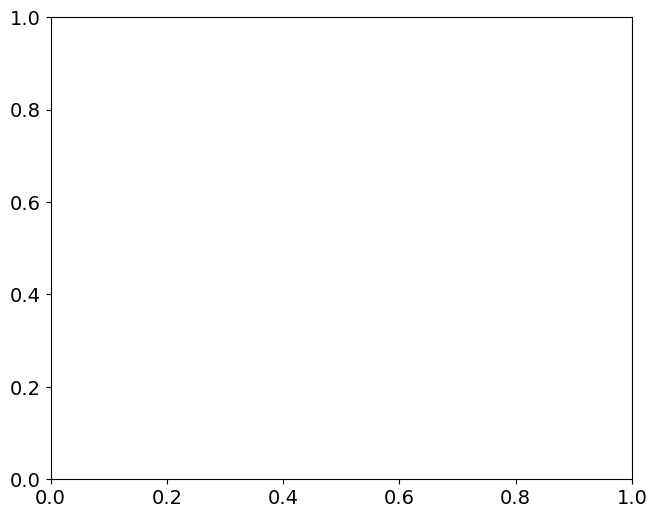

In [120]:
# fig = plt.figure(figsize=(15,6))
fig = plt.figure(figsize=(7.5,6))

ax1 = fig.add_subplot(1,1,1)
# df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.271)": "orange", "CI location (r$^2$ = 0.355)": "red"})
# df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.503)": "orange", "CI location (r$^2$ = 0.509)": "red"})
df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.244)": "orange", "CI location (r$^2$ = 0.304)": "red"})
ax1.legend(fontsize=16)
ax1.set_ylabel('Contribution to r$^2$ (%)', fontsize=16)
#ax1.set_title('Predictors of Wide Cell Max 10-dBZ ETH', fontsize=20)
ax1.set_title('Predictors of Wide Axis Cell Max 10-dBZ ETH', fontsize=20)
#ax1.set_title('Predictors of Wide Cell Max Reflectivity', fontsize=20)
ax1.set_ylim(0,55)
plt.xticks(horizontalalignment = 'right')

plt.tight_layout()
# plt.savefig('Wide_Cell_Subset_Predictor_Contributions_Max10dBZETH_CIloc-15min.png')
# plt.savefig('Wide_Cell_Subset_wDiam_Predictor_Contributions_Max10dBZETH_CIloc-15min.png')
plt.savefig('Wide_Axis_Cell_Subset_Predictor_Contributions_Max10dBZETH_CIloc-15min.png')

In [34]:
wrf_amf_relimp_perc = lm_wrf_wide_amf_std_subset_irtb[['relimp_perc']].to_numpy()[1:].squeeze()
wrf_ci_relimp_perc = lm_wrf_wide_ci_std_subset_irtb[['relimp_perc']].to_numpy()[1:].squeeze()
# wrf_amf_relimp_perc = lm_wrf_wide_amf_std_all_irtb[['relimp_perc']].to_numpy()[1:].squeeze()
# wrf_ci_relimp_perc = lm_wrf_wide_ci_std_all_irtb[['relimp_perc']].to_numpy()[1:].squeeze()

# index = ['MU LNB', '$\sqrt{2*MUCAPE}$', 'MU LCL Height', '5-km RH', '0-6 km BWD']
# df = pd.DataFrame({'AMF location (r$^2$ = 0.199)': wrf_amf_relimp_perc,
#                    'CI location (r$^2$ = 0.206)': wrf_ci_relimp_perc}, index=index)
# index = ['Max Diameter', 'MU LNB', '$\sqrt{2*MUCAPE}$', 'MU LCL Height', '5-km RH', '0-6 km BWD']
# df = pd.DataFrame({'AMF location (r$^2$ = 0.340)': wrf_amf_relimp_perc,
#                    'CI location (r$^2$ = 0.326)': wrf_ci_relimp_perc}, index=index)
index = ['MU LNB', '$\sqrt{2*MUCAPE}$', 'MU LCL Height', '5-km RH', '0-6 km BWD']
df = pd.DataFrame({'AMF location (r$^2$ = 0.168)': wrf_amf_relimp_perc,
                   'CI location (r$^2$ = 0.172)': wrf_ci_relimp_perc}, index=index)

# fig = plt.figure(figsize=(15,6))
fig = plt.figure(figsize=(7.5,6))

ax1 = fig.add_subplot(1,1,1)
# df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.199)": "orange", "CI location (r$^2$ = 0.206)": "red"})
# df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.340)": "orange", "CI location (r$^2$ = 0.326)": "red"})
df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.168)": "orange", "CI location (r$^2$ = 0.172)": "red"})
ax1.legend(fontsize=16)
ax1.set_ylabel('Contribution to r$^2$ (%)', fontsize=16)
#ax1.set_title('Predictors of Wide Cell Min IR T$_b$', fontsize=20)
ax1.set_title('Predictors of Wide Axis Cell Min IR T$_b$', fontsize=20)
ax1.set_ylim(0,55)
plt.xticks(horizontalalignment = 'right')

plt.tight_layout()
# plt.savefig('Wide_Cell_Subset_Predictor_Contributions_MinIRTb_CIloc-15min.png')
# plt.savefig('Wide_Cell_Subset_wDiam_Predictor_Contributions_MinIRTb_CIloc-15min.png')
plt.savefig('Wide_Axis_Cell_Subset_Predictor_Contributions_MinIRTb_CIloc-15min.png')

NameError: name 'lm_wrf_wide_amf_std_subset_irtb' is not defined

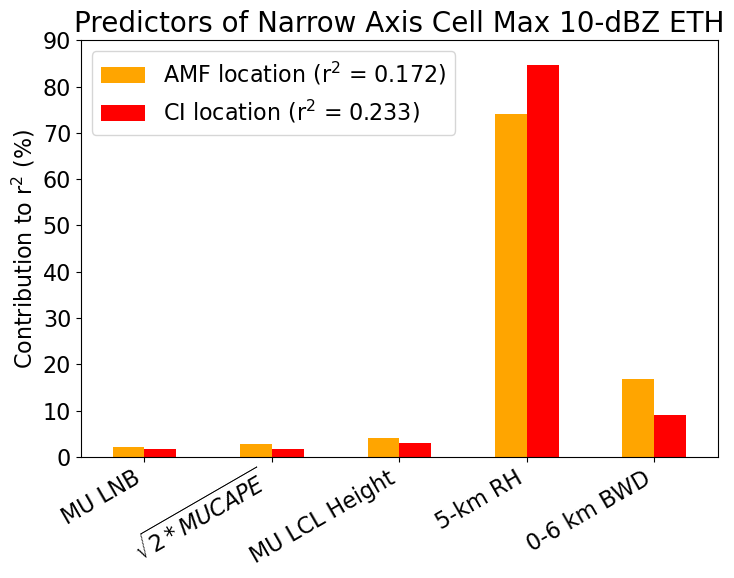

In [53]:
wrf_amf_relimp_perc = lm_wrf_narrow_amf_std_subset_eth[['relimp_perc']].to_numpy()[1:].squeeze()
wrf_ci_relimp_perc = lm_wrf_narrow_ci_std_subset_eth[['relimp_perc']].to_numpy()[1:].squeeze()
# wrf_amf_relimp_perc = lm_wrf_narrow_amf_std_all_eth[['relimp_perc']].to_numpy()[1:].squeeze()
# wrf_ci_relimp_perc = lm_wrf_narrow_ci_std_all_eth[['relimp_perc']].to_numpy()[1:].squeeze()

# index = ['MU LNB', '$\sqrt{2*MUCAPE}$', 'MU LCL Height', '5-km RH', '0-6 km BWD']
# df = pd.DataFrame({'AMF location (r$^2$ = 0.177)': wrf_amf_relimp_perc,
#                    'CI location (r$^2$ = 0.239)': wrf_ci_relimp_perc}, index=index)
# index = ['Max Diameter', 'MU LNB', '$\sqrt{2*MUCAPE}$', 'MU LCL Height', '5-km RH', '0-6 km BWD']
# df = pd.DataFrame({'AMF location (r$^2$ = 0.280)': wrf_amf_relimp_perc,
#                    'CI location (r$^2$ = 0.334)': wrf_ci_relimp_perc}, index=index)
index = ['MU LNB', '$\sqrt{2*MUCAPE}$', 'MU LCL Height', '5-km RH', '0-6 km BWD']
df = pd.DataFrame({'AMF location (r$^2$ = 0.172)': wrf_amf_relimp_perc,
                   'CI location (r$^2$ = 0.233)': wrf_ci_relimp_perc}, index=index)

# fig = plt.figure(figsize=(15,6))
fig = plt.figure(figsize=(7.5,6))

ax1 = fig.add_subplot(1,1,1)
#df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.177)": "orange", "CI location (r$^2$ = 0.239)": "red"})
# df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.280)": "orange", "CI location (r$^2$ = 0.334)": "red"})
df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.172)": "orange", "CI location (r$^2$ = 0.233)": "red"})
ax1.legend(fontsize=16)
ax1.set_ylabel('Contribution to r$^2$ (%)', fontsize=16)
# ax1.set_title('Predictors of Narrow Cell Max 10-dBZ ETH', fontsize=20)
ax1.set_title('Predictors of Narrow Axis Cell Max 10-dBZ ETH', fontsize=20)
#ax1.set_title('Predictors of Narrow Cell Max Reflectivity', fontsize=20)
ax1.set_ylim(0,90)
plt.xticks(horizontalalignment = 'right')

plt.tight_layout()
#plt.savefig('Narrow_Cell_Subset_Predictor_Contributions_Max10dBZETH_CIloc-15min.png')
#plt.savefig('Narrow_Cell_Subset_wDiam_Predictor_Contributions_Max10dBZETH_CIloc-15min.png')
plt.savefig('Narrow_Axis_Cell_Subset_Predictor_Contributions_Max10dBZETH_CIloc-15min.png')

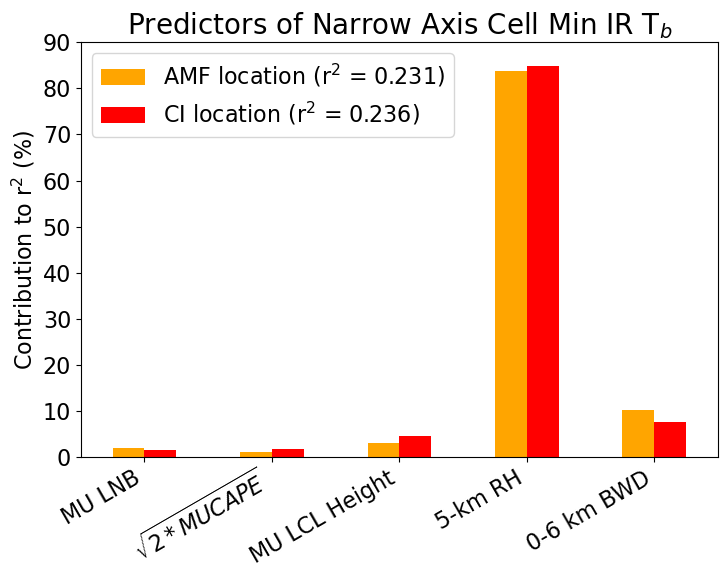

In [54]:
wrf_amf_relimp_perc = lm_wrf_narrow_amf_std_subset_irtb[['relimp_perc']].to_numpy()[1:].squeeze()
wrf_ci_relimp_perc = lm_wrf_narrow_ci_std_subset_irtb[['relimp_perc']].to_numpy()[1:].squeeze()
# wrf_amf_relimp_perc = lm_wrf_narrow_amf_std_all_irtb[['relimp_perc']].to_numpy()[1:].squeeze()
# wrf_ci_relimp_perc = lm_wrf_narrow_ci_std_all_irtb[['relimp_perc']].to_numpy()[1:].squeeze()

# index = ['MU LNB', '$\sqrt{2*MUCAPE}$', 'MU LCL Height', '5-km RH', '0-6 km BWD']
# df = pd.DataFrame({'AMF location (r$^2$ = 0.239)': wrf_amf_relimp_perc,
#                    'CI location (r$^2$ = 0.237)': wrf_ci_relimp_perc}, index=index)
# index = ['Max Diameter', 'MU LNB', '$\sqrt{2*MUCAPE}$', 'MU LCL Height', '5-km RH', '0-6 km BWD']
# df = pd.DataFrame({'AMF location (r$^2$ = 0.250)': wrf_amf_relimp_perc,
#                    'CI location (r$^2$ = 0.255)': wrf_ci_relimp_perc}, index=index)
index = ['MU LNB', '$\sqrt{2*MUCAPE}$', 'MU LCL Height', '5-km RH', '0-6 km BWD']
df = pd.DataFrame({'AMF location (r$^2$ = 0.231)': wrf_amf_relimp_perc,
                   'CI location (r$^2$ = 0.236)': wrf_ci_relimp_perc}, index=index)

# fig = plt.figure(figsize=(15,6))
fig = plt.figure(figsize=(7.5,6))

ax1 = fig.add_subplot(1,1,1)
#df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.239)": "orange", "CI location (r$^2$ = 0.237)": "red"})
#df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.250)": "orange", "CI location (r$^2$ = 0.255)": "red"})
df.plot.bar(ax=ax1, rot=30, fontsize=16, color={"AMF location (r$^2$ = 0.231)": "orange", "CI location (r$^2$ = 0.236)": "red"})
ax1.legend(fontsize=16)
ax1.set_ylabel('Contribution to r$^2$ (%)', fontsize=16)
# ax1.set_title('Predictors of Narrow Cell Min IR T$_b$', fontsize=20)
ax1.set_title('Predictors of Narrow Axis Cell Min IR T$_b$', fontsize=20)
ax1.set_ylim(0,90)
plt.xticks(horizontalalignment = 'right')

plt.tight_layout()
#plt.savefig('Narrow_Cell_Subset_Predictor_Contributions_MinIRTb_CIloc-15min.png')
#plt.savefig('Narrow_Cell_Subset_wDiam_Predictor_Contributions_MinIRTb_CIloc-15min.png')
plt.savefig('Narrow_Axis_Cell_Subset_Predictor_Contributions_MinIRTb_CIloc-15min.png')

In [55]:
#Convert to numpy arrays for subsequent plots
#wide all
wrf_wide_amf_stdcoef_all_eth = lm_wrf_wide_amf_std_all_eth[['coef']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdcoef_all_eth = lm_wrf_wide_ci_std_all_eth[['coef']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdcoeflow_all_eth = lm_wrf_wide_amf_std_all_eth[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdcoeflow_all_eth = lm_wrf_wide_ci_std_all_eth[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdcoefhigh_all_eth = lm_wrf_wide_amf_std_all_eth[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdcoefhigh_all_eth = lm_wrf_wide_ci_std_all_eth[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdr2_all_eth = lm_wrf_wide_amf_std_all_eth[['r2']].to_numpy()[0].squeeze()
wrf_wide_ci_stdr2_all_eth = lm_wrf_wide_ci_std_all_eth[['r2']].to_numpy()[0].squeeze()
wrf_wide_amf_stdpval_all_eth = lm_wrf_wide_amf_std_all_eth[['pval']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdpval_all_eth = lm_wrf_wide_ci_std_all_eth[['pval']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdrelimp_all_eth = lm_wrf_wide_amf_std_all_eth[['relimp_perc']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdrelimp_all_eth = lm_wrf_wide_ci_std_all_eth[['relimp_perc']].to_numpy()[1:].squeeze()

#subset
wrf_wide_amf_stdcoef_subset_eth = lm_wrf_wide_amf_std_subset_eth[['coef']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdcoef_subset_eth = lm_wrf_wide_ci_std_subset_eth[['coef']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdcoeflow_subset_eth = lm_wrf_wide_amf_std_subset_eth[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdcoeflow_subset_eth = lm_wrf_wide_ci_std_subset_eth[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdcoefhigh_subset_eth = lm_wrf_wide_amf_std_subset_eth[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdcoefhigh_subset_eth = lm_wrf_wide_ci_std_subset_eth[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdr2_subset_eth = lm_wrf_wide_amf_std_subset_eth[['r2']].to_numpy()[0].squeeze()
wrf_wide_ci_stdr2_subset_eth = lm_wrf_wide_ci_std_subset_eth[['r2']].to_numpy()[0].squeeze()
wrf_wide_amf_stdpval_subset_eth = lm_wrf_wide_amf_std_subset_eth[['pval']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdpval_subset_eth = lm_wrf_wide_ci_std_subset_eth[['pval']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdrelimp_subset_eth = lm_wrf_wide_amf_std_subset_eth[['relimp_perc']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdrelimp_subset_eth = lm_wrf_wide_ci_std_subset_eth[['relimp_perc']].to_numpy()[1:].squeeze()

#narrow all
wrf_narrow_amf_stdcoef_all_eth = lm_wrf_narrow_amf_std_all_eth[['coef']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdcoef_all_eth = lm_wrf_narrow_ci_std_all_eth[['coef']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdcoeflow_all_eth = lm_wrf_narrow_amf_std_all_eth[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdcoeflow_all_eth = lm_wrf_narrow_ci_std_all_eth[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdcoefhigh_all_eth = lm_wrf_narrow_amf_std_all_eth[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdcoefhigh_all_eth = lm_wrf_narrow_ci_std_all_eth[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdr2_all_eth = lm_wrf_narrow_amf_std_all_eth[['r2']].to_numpy()[0].squeeze()
wrf_narrow_ci_stdr2_all_eth = lm_wrf_narrow_ci_std_all_eth[['r2']].to_numpy()[0].squeeze()
wrf_narrow_amf_stdpval_all_eth = lm_wrf_narrow_amf_std_all_eth[['pval']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdpval_all_eth = lm_wrf_narrow_ci_std_all_eth[['pval']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdrelimp_all_eth = lm_wrf_narrow_amf_std_all_eth[['relimp_perc']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdrelimp_all_eth = lm_wrf_narrow_ci_std_all_eth[['relimp_perc']].to_numpy()[1:].squeeze()

#narrow subset
wrf_narrow_amf_stdcoef_subset_eth = lm_wrf_narrow_amf_std_subset_eth[['coef']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdcoef_subset_eth = lm_wrf_narrow_ci_std_subset_eth[['coef']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdcoeflow_subset_eth = lm_wrf_narrow_amf_std_subset_eth[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdcoeflow_subset_eth = lm_wrf_narrow_ci_std_subset_eth[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdcoefhigh_subset_eth = lm_wrf_narrow_amf_std_subset_eth[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdcoefhigh_subset_eth = lm_wrf_narrow_ci_std_subset_eth[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdr2_subset_eth = lm_wrf_narrow_amf_std_subset_eth[['r2']].to_numpy()[0].squeeze()
wrf_narrow_ci_stdr2_subset_eth = lm_wrf_narrow_ci_std_subset_eth[['r2']].to_numpy()[0].squeeze()
wrf_narrow_amf_stdpval_subset_eth = lm_wrf_narrow_amf_std_subset_eth[['pval']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdpval_subset_eth = lm_wrf_narrow_ci_std_subset_eth[['pval']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdrelimp_subset_eth = lm_wrf_narrow_amf_std_subset_eth[['relimp_perc']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdrelimp_subset_eth = lm_wrf_narrow_ci_std_subset_eth[['relimp_perc']].to_numpy()[1:].squeeze()

In [56]:
# IR Tb
#wide all
wrf_wide_amf_stdcoef_all_irtb = lm_wrf_wide_amf_std_all_irtb[['coef']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdcoef_all_irtb = lm_wrf_wide_ci_std_all_irtb[['coef']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdcoeflow_all_irtb = lm_wrf_wide_amf_std_all_irtb[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdcoeflow_all_irtb = lm_wrf_wide_ci_std_all_irtb[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdcoefhigh_all_irtb = lm_wrf_wide_amf_std_all_irtb[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdcoefhigh_all_irtb = lm_wrf_wide_ci_std_all_irtb[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdr2_all_irtb = lm_wrf_wide_amf_std_all_irtb[['r2']].to_numpy()[0].squeeze()
wrf_wide_ci_stdr2_all_irtb = lm_wrf_wide_ci_std_all_irtb[['r2']].to_numpy()[0].squeeze()
wrf_wide_amf_stdpval_all_irtb = lm_wrf_wide_amf_std_all_irtb[['pval']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdpval_all_irtb = lm_wrf_wide_ci_std_all_irtb[['pval']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdrelimp_all_irtb = lm_wrf_wide_amf_std_all_irtb[['relimp_perc']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdrelimp_all_irtb = lm_wrf_wide_ci_std_all_irtb[['relimp_perc']].to_numpy()[1:].squeeze()

#subset
wrf_wide_amf_stdcoef_subset_irtb = lm_wrf_wide_amf_std_subset_irtb[['coef']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdcoef_subset_irtb = lm_wrf_wide_ci_std_subset_irtb[['coef']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdcoeflow_subset_irtb = lm_wrf_wide_amf_std_subset_irtb[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdcoeflow_subset_irtb = lm_wrf_wide_ci_std_subset_irtb[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdcoefhigh_subset_irtb = lm_wrf_wide_amf_std_subset_irtb[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdcoefhigh_subset_irtb = lm_wrf_wide_ci_std_subset_irtb[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdr2_subset_irtb = lm_wrf_wide_amf_std_subset_irtb[['r2']].to_numpy()[0].squeeze()
wrf_wide_ci_stdr2_subset_irtb = lm_wrf_wide_ci_std_subset_irtb[['r2']].to_numpy()[0].squeeze()
wrf_wide_amf_stdpval_subset_irtb = lm_wrf_wide_amf_std_subset_irtb[['pval']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdpval_subset_irtb = lm_wrf_wide_ci_std_subset_irtb[['pval']].to_numpy()[1:].squeeze()
wrf_wide_amf_stdrelimp_subset_irtb = lm_wrf_wide_amf_std_subset_irtb[['relimp_perc']].to_numpy()[1:].squeeze()
wrf_wide_ci_stdrelimp_subset_irtb = lm_wrf_wide_ci_std_subset_irtb[['relimp_perc']].to_numpy()[1:].squeeze()

#narrow all
wrf_narrow_amf_stdcoef_all_irtb = lm_wrf_narrow_amf_std_all_irtb[['coef']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdcoef_all_irtb = lm_wrf_narrow_ci_std_all_irtb[['coef']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdcoeflow_all_irtb = lm_wrf_narrow_amf_std_all_irtb[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdcoeflow_all_irtb = lm_wrf_narrow_ci_std_all_irtb[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdcoefhigh_all_irtb = lm_wrf_narrow_amf_std_all_irtb[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdcoefhigh_all_irtb = lm_wrf_narrow_ci_std_all_irtb[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdr2_all_irtb = lm_wrf_narrow_amf_std_all_irtb[['r2']].to_numpy()[0].squeeze()
wrf_narrow_ci_stdr2_all_irtb = lm_wrf_narrow_ci_std_all_irtb[['r2']].to_numpy()[0].squeeze()
wrf_narrow_amf_stdpval_all_irtb = lm_wrf_narrow_amf_std_all_irtb[['pval']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdpval_all_irtb = lm_wrf_narrow_ci_std_all_irtb[['pval']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdrelimp_all_irtb = lm_wrf_narrow_amf_std_all_irtb[['relimp_perc']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdrelimp_all_irtb = lm_wrf_narrow_ci_std_all_irtb[['relimp_perc']].to_numpy()[1:].squeeze()

#narrow subset
wrf_narrow_amf_stdcoef_subset_irtb = lm_wrf_narrow_amf_std_subset_irtb[['coef']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdcoef_subset_irtb = lm_wrf_narrow_ci_std_subset_irtb[['coef']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdcoeflow_subset_irtb = lm_wrf_narrow_amf_std_subset_irtb[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdcoeflow_subset_irtb = lm_wrf_narrow_ci_std_subset_irtb[['CI[2.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdcoefhigh_subset_irtb = lm_wrf_narrow_amf_std_subset_irtb[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdcoefhigh_subset_irtb = lm_wrf_narrow_ci_std_subset_irtb[['CI[97.5%]']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdr2_subset_irtb = lm_wrf_narrow_amf_std_subset_irtb[['r2']].to_numpy()[0].squeeze()
wrf_narrow_ci_stdr2_subset_irtb = lm_wrf_narrow_ci_std_subset_irtb[['r2']].to_numpy()[0].squeeze()
wrf_narrow_amf_stdpval_subset_irtb = lm_wrf_narrow_amf_std_subset_irtb[['pval']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdpval_subset_irtb = lm_wrf_narrow_ci_std_subset_irtb[['pval']].to_numpy()[1:].squeeze()
wrf_narrow_amf_stdrelimp_subset_irtb = lm_wrf_narrow_amf_std_subset_irtb[['relimp_perc']].to_numpy()[1:].squeeze()
wrf_narrow_ci_stdrelimp_subset_irtb = lm_wrf_narrow_ci_std_subset_irtb[['relimp_perc']].to_numpy()[1:].squeeze()

In [57]:
#variable names for plots
# variables_all = ['Max Diameter', 'MU LNB', '$\sqrt{2*MUCAPE}$', 'MU LCL Height', '5-km RH', '0-6 km BWD']
variables_all = ['Max Minor Axis Length', 'MU LNB', '$\sqrt{2*MUCAPE}$', 'MU LCL Height', '5-km RH', '0-6 km BWD']
variables_subset = ['MU LNB', '$\sqrt{2*MUCAPE}$', 'MU LCL Height', '5-km RH', '0-6 km BWD']

In [58]:
#MLR coefficients for WRF for CI location 15 min prior to CI compared to the observing site

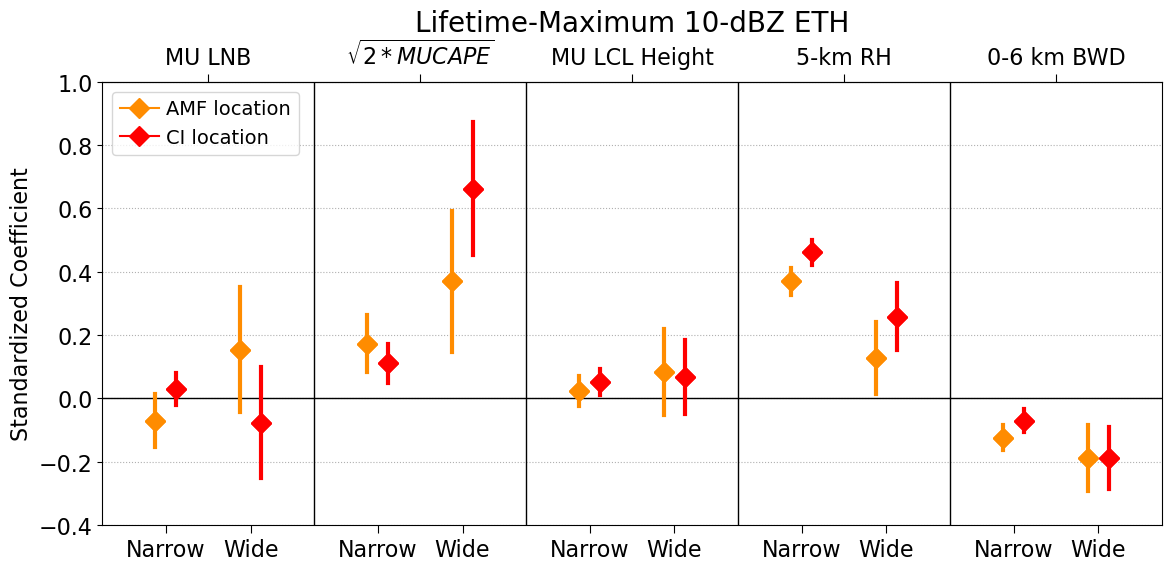

In [59]:
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,1,1)
ax1.plot([0,10], [0,0], 'k-', linewidth=1)

ax1.plot([0.5,0.5], [wrf_narrow_amf_stdcoef_subset_eth[0], wrf_narrow_amf_stdcoef_subset_eth[0]], color='darkorange', marker='D', markersize=10, label='AMF location')
ax1.plot([0.5,0.5], [wrf_narrow_amf_stdcoeflow_subset_eth[0], wrf_narrow_amf_stdcoefhigh_subset_eth[0]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([0.7,0.7], [wrf_narrow_ci_stdcoef_subset_eth[0], wrf_narrow_ci_stdcoef_subset_eth[0]], color='red', marker='D', markersize=10, label='CI location')
ax1.plot([0.7,0.7], [wrf_narrow_ci_stdcoeflow_subset_eth[0], wrf_narrow_ci_stdcoefhigh_subset_eth[0]], color='red', linestyle='-', linewidth=3)

ax1.plot([1.3,1.3], [wrf_wide_amf_stdcoef_subset_eth[0], wrf_wide_amf_stdcoef_subset_eth[0]], color='darkorange', marker='D', markersize=10)
ax1.plot([1.3,1.3], [wrf_wide_amf_stdcoeflow_subset_eth[0], wrf_wide_amf_stdcoefhigh_subset_eth[0]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([1.5,1.5], [wrf_wide_ci_stdcoef_subset_eth[0], wrf_wide_ci_stdcoef_subset_eth[0]], color='red', marker='D', markersize=10)
ax1.plot([1.5,1.5], [wrf_wide_ci_stdcoeflow_subset_eth[0], wrf_wide_ci_stdcoefhigh_subset_eth[0]], color='red', linestyle='-', linewidth=3)

ax1.plot([2.5,2.5], [wrf_narrow_amf_stdcoef_subset_eth[1], wrf_narrow_amf_stdcoef_subset_eth[1]], color='darkorange', marker='D', markersize=10)
ax1.plot([2.5,2.5], [wrf_narrow_amf_stdcoeflow_subset_eth[1], wrf_narrow_amf_stdcoefhigh_subset_eth[1]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([2.7,2.7], [wrf_narrow_ci_stdcoef_subset_eth[1], wrf_narrow_ci_stdcoef_subset_eth[1]], color='red', marker='D', markersize=10)
ax1.plot([2.7,2.7], [wrf_narrow_ci_stdcoeflow_subset_eth[1], wrf_narrow_ci_stdcoefhigh_subset_eth[1]], color='red', linestyle='-', linewidth=3)

ax1.plot([3.3,3.3], [wrf_wide_amf_stdcoef_subset_eth[1], wrf_wide_amf_stdcoef_subset_eth[1]], color='darkorange', marker='D', markersize=10)
ax1.plot([3.3,3.3], [wrf_wide_amf_stdcoeflow_subset_eth[1], wrf_wide_amf_stdcoefhigh_subset_eth[1]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([3.5,3.5], [wrf_wide_ci_stdcoef_subset_eth[1], wrf_wide_ci_stdcoef_subset_eth[1]], color='red', marker='D', markersize=10)
ax1.plot([3.5,3.5], [wrf_wide_ci_stdcoeflow_subset_eth[1], wrf_wide_ci_stdcoefhigh_subset_eth[1]], color='red', linestyle='-', linewidth=3)

ax1.plot([4.5,4.5], [wrf_narrow_amf_stdcoef_subset_eth[2], wrf_narrow_amf_stdcoef_subset_eth[2]], color='darkorange', marker='D', markersize=10)
ax1.plot([4.5,4.5], [wrf_narrow_amf_stdcoeflow_subset_eth[2], wrf_narrow_amf_stdcoefhigh_subset_eth[2]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([4.7,4.7], [wrf_narrow_ci_stdcoef_subset_eth[2], wrf_narrow_ci_stdcoef_subset_eth[2]], color='red', marker='D', markersize=10)
ax1.plot([4.7,4.7], [wrf_narrow_ci_stdcoeflow_subset_eth[2], wrf_narrow_ci_stdcoefhigh_subset_eth[2]], color='red', linestyle='-', linewidth=3)

ax1.plot([5.3,5.3], [wrf_wide_amf_stdcoef_subset_eth[2], wrf_wide_amf_stdcoef_subset_eth[2]], color='darkorange', marker='D', markersize=10)
ax1.plot([5.3,5.3], [wrf_wide_amf_stdcoeflow_subset_eth[2], wrf_wide_amf_stdcoefhigh_subset_eth[2]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([5.5,5.5], [wrf_wide_ci_stdcoef_subset_eth[2], wrf_wide_ci_stdcoef_subset_eth[2]], color='red', marker='D', markersize=10)
ax1.plot([5.5,5.5], [wrf_wide_ci_stdcoeflow_subset_eth[2], wrf_wide_ci_stdcoefhigh_subset_eth[2]], color='red', linestyle='-', linewidth=3)

ax1.plot([6.5,6.5], [wrf_narrow_amf_stdcoef_subset_eth[3], wrf_narrow_amf_stdcoef_subset_eth[3]], color='darkorange', marker='D', markersize=10)
ax1.plot([6.5,6.5], [wrf_narrow_amf_stdcoeflow_subset_eth[3], wrf_narrow_amf_stdcoefhigh_subset_eth[3]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([6.7,6.7], [wrf_narrow_ci_stdcoef_subset_eth[3], wrf_narrow_ci_stdcoef_subset_eth[3]], color='red', marker='D', markersize=10)
ax1.plot([6.7,6.7], [wrf_narrow_ci_stdcoeflow_subset_eth[3], wrf_narrow_ci_stdcoefhigh_subset_eth[3]], color='red', linestyle='-', linewidth=3)

ax1.plot([7.3,7.3], [wrf_wide_amf_stdcoef_subset_eth[3], wrf_wide_amf_stdcoef_subset_eth[3]], color='darkorange', marker='D', markersize=10)
ax1.plot([7.3,7.3], [wrf_wide_amf_stdcoeflow_subset_eth[3], wrf_wide_amf_stdcoefhigh_subset_eth[3]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([7.5,7.5], [wrf_wide_ci_stdcoef_subset_eth[3], wrf_wide_ci_stdcoef_subset_eth[3]], color='red', marker='D', markersize=10)
ax1.plot([7.5,7.5], [wrf_wide_ci_stdcoeflow_subset_eth[3], wrf_wide_ci_stdcoefhigh_subset_eth[3]], color='red', linestyle='-', linewidth=3)

ax1.plot([8.5,8.5], [wrf_narrow_amf_stdcoef_subset_eth[4], wrf_narrow_amf_stdcoef_subset_eth[4]], color='darkorange', marker='D', markersize=10)
ax1.plot([8.5,8.5], [wrf_narrow_amf_stdcoeflow_subset_eth[4], wrf_narrow_amf_stdcoefhigh_subset_eth[4]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([8.7,8.7], [wrf_narrow_ci_stdcoef_subset_eth[4], wrf_narrow_ci_stdcoef_subset_eth[4]], color='red', marker='D', markersize=10)
ax1.plot([8.7,8.7], [wrf_narrow_ci_stdcoeflow_subset_eth[4], wrf_narrow_ci_stdcoefhigh_subset_eth[4]], color='red', linestyle='-', linewidth=3)

ax1.plot([9.3,9.3], [wrf_wide_amf_stdcoef_subset_eth[4], wrf_wide_amf_stdcoef_subset_eth[4]], color='darkorange', marker='D', markersize=10)
ax1.plot([9.3,9.3], [wrf_wide_amf_stdcoeflow_subset_eth[4], wrf_wide_amf_stdcoefhigh_subset_eth[4]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([9.5,9.5], [wrf_wide_ci_stdcoef_subset_eth[4], wrf_wide_ci_stdcoef_subset_eth[4]], color='red', marker='D', markersize=10)
ax1.plot([9.5,9.5], [wrf_wide_ci_stdcoeflow_subset_eth[4], wrf_wide_ci_stdcoefhigh_subset_eth[4]], color='red', linestyle='-', linewidth=3)

ax1.set_xlim(0,10)
ax1.tick_params('x', length=6)
plt.xticks(ticks=[0.6,1.4,2.6,3.4,4.6,5.4,6.6,7.4,8.6,9.4],labels=['Narrow','Wide','Narrow','Wide','Narrow','Wide','Narrow','Wide','Narrow','Wide'])
secax = ax1.secondary_xaxis('top')
secax.tick_params('x', length=6)
secax.set_xticks(ticks=[1,3,5,7,9])
secax.set_xticklabels([variables_subset[0],variables_subset[1],variables_subset[2],variables_subset[3],variables_subset[4]])
ax1.set_ylim(-0.4,1)
ax1.set_ylabel('Standardized Coefficient', color='black', fontsize=16)
ax1.set_title('Lifetime-Maximum 10-dBZ ETH', fontsize=20)
ax1.grid(axis='y', linestyle=':')
ax1.plot([2,2],[-1,1], 'k-', linewidth=1)
ax1.plot([4,4],[-1,1], 'k-', linewidth=1)
ax1.plot([6,6],[-1,1], 'k-', linewidth=1)
ax1.plot([8,8],[-1,1], 'k-', linewidth=1)
ax1.legend(loc='upper left', fontsize=14, ncol=1, labelspacing=0.5, columnspacing=2.0, handletextpad=0.4)

plt.tight_layout()
#plt.savefig('MLR_ETH_Standardized_Coefficients_Subset_CIloc-15min.png')
plt.savefig('MLR_ETH_Standardized_Coefficients_Subset_CIloc-15min_Ax.png')

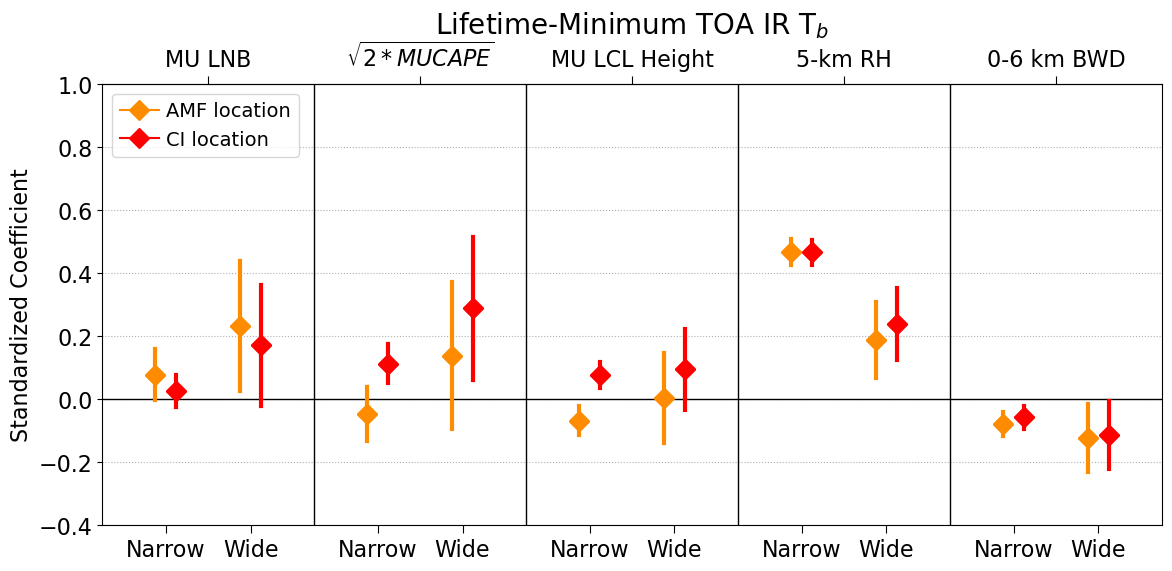

In [60]:
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,1,1)
ax1.plot([0,10], [0,0], 'k-', linewidth=1)

ax1.plot([0.5,0.5], [wrf_narrow_amf_stdcoef_subset_irtb[0], wrf_narrow_amf_stdcoef_subset_irtb[0]], color='darkorange', marker='D', markersize=10, label='AMF location')
ax1.plot([0.5,0.5], [wrf_narrow_amf_stdcoeflow_subset_irtb[0], wrf_narrow_amf_stdcoefhigh_subset_irtb[0]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([0.7,0.7], [wrf_narrow_ci_stdcoef_subset_irtb[0], wrf_narrow_ci_stdcoef_subset_irtb[0]], color='red', marker='D', markersize=10, label='CI location')
ax1.plot([0.7,0.7], [wrf_narrow_ci_stdcoeflow_subset_irtb[0], wrf_narrow_ci_stdcoefhigh_subset_irtb[0]], color='red', linestyle='-', linewidth=3)

ax1.plot([1.3,1.3], [wrf_wide_amf_stdcoef_subset_irtb[0], wrf_wide_amf_stdcoef_subset_irtb[0]], color='darkorange', marker='D', markersize=10)
ax1.plot([1.3,1.3], [wrf_wide_amf_stdcoeflow_subset_irtb[0], wrf_wide_amf_stdcoefhigh_subset_irtb[0]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([1.5,1.5], [wrf_wide_ci_stdcoef_subset_irtb[0], wrf_wide_ci_stdcoef_subset_irtb[0]], color='red', marker='D', markersize=10)
ax1.plot([1.5,1.5], [wrf_wide_ci_stdcoeflow_subset_irtb[0], wrf_wide_ci_stdcoefhigh_subset_irtb[0]], color='red', linestyle='-', linewidth=3)

ax1.plot([2.5,2.5], [wrf_narrow_amf_stdcoef_subset_irtb[1], wrf_narrow_amf_stdcoef_subset_irtb[1]], color='darkorange', marker='D', markersize=10)
ax1.plot([2.5,2.5], [wrf_narrow_amf_stdcoeflow_subset_irtb[1], wrf_narrow_amf_stdcoefhigh_subset_irtb[1]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([2.7,2.7], [wrf_narrow_ci_stdcoef_subset_irtb[1], wrf_narrow_ci_stdcoef_subset_irtb[1]], color='red', marker='D', markersize=10)
ax1.plot([2.7,2.7], [wrf_narrow_ci_stdcoeflow_subset_irtb[1], wrf_narrow_ci_stdcoefhigh_subset_irtb[1]], color='red', linestyle='-', linewidth=3)

ax1.plot([3.3,3.3], [wrf_wide_amf_stdcoef_subset_irtb[1], wrf_wide_amf_stdcoef_subset_irtb[1]], color='darkorange', marker='D', markersize=10)
ax1.plot([3.3,3.3], [wrf_wide_amf_stdcoeflow_subset_irtb[1], wrf_wide_amf_stdcoefhigh_subset_irtb[1]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([3.5,3.5], [wrf_wide_ci_stdcoef_subset_irtb[1], wrf_wide_ci_stdcoef_subset_irtb[1]], color='red', marker='D', markersize=10)
ax1.plot([3.5,3.5], [wrf_wide_ci_stdcoeflow_subset_irtb[1], wrf_wide_ci_stdcoefhigh_subset_irtb[1]], color='red', linestyle='-', linewidth=3)

ax1.plot([4.5,4.5], [wrf_narrow_amf_stdcoef_subset_irtb[2], wrf_narrow_amf_stdcoef_subset_irtb[2]], color='darkorange', marker='D', markersize=10)
ax1.plot([4.5,4.5], [wrf_narrow_amf_stdcoeflow_subset_irtb[2], wrf_narrow_amf_stdcoefhigh_subset_irtb[2]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([4.7,4.7], [wrf_narrow_ci_stdcoef_subset_irtb[2], wrf_narrow_ci_stdcoef_subset_irtb[2]], color='red', marker='D', markersize=10)
ax1.plot([4.7,4.7], [wrf_narrow_ci_stdcoeflow_subset_irtb[2], wrf_narrow_ci_stdcoefhigh_subset_irtb[2]], color='red', linestyle='-', linewidth=3)

ax1.plot([5.3,5.3], [wrf_wide_amf_stdcoef_subset_irtb[2], wrf_wide_amf_stdcoef_subset_irtb[2]], color='darkorange', marker='D', markersize=10)
ax1.plot([5.3,5.3], [wrf_wide_amf_stdcoeflow_subset_irtb[2], wrf_wide_amf_stdcoefhigh_subset_irtb[2]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([5.5,5.5], [wrf_wide_ci_stdcoef_subset_irtb[2], wrf_wide_ci_stdcoef_subset_irtb[2]], color='red', marker='D', markersize=10)
ax1.plot([5.5,5.5], [wrf_wide_ci_stdcoeflow_subset_irtb[2], wrf_wide_ci_stdcoefhigh_subset_irtb[2]], color='red', linestyle='-', linewidth=3)

ax1.plot([6.5,6.5], [wrf_narrow_amf_stdcoef_subset_irtb[3], wrf_narrow_amf_stdcoef_subset_irtb[3]], color='darkorange', marker='D', markersize=10)
ax1.plot([6.5,6.5], [wrf_narrow_amf_stdcoeflow_subset_irtb[3], wrf_narrow_amf_stdcoefhigh_subset_irtb[3]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([6.7,6.7], [wrf_narrow_ci_stdcoef_subset_irtb[3], wrf_narrow_ci_stdcoef_subset_irtb[3]], color='red', marker='D', markersize=10)
ax1.plot([6.7,6.7], [wrf_narrow_ci_stdcoeflow_subset_irtb[3], wrf_narrow_ci_stdcoefhigh_subset_irtb[3]], color='red', linestyle='-', linewidth=3)

ax1.plot([7.3,7.3], [wrf_wide_amf_stdcoef_subset_irtb[3], wrf_wide_amf_stdcoef_subset_irtb[3]], color='darkorange', marker='D', markersize=10)
ax1.plot([7.3,7.3], [wrf_wide_amf_stdcoeflow_subset_irtb[3], wrf_wide_amf_stdcoefhigh_subset_irtb[3]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([7.5,7.5], [wrf_wide_ci_stdcoef_subset_irtb[3], wrf_wide_ci_stdcoef_subset_irtb[3]], color='red', marker='D', markersize=10)
ax1.plot([7.5,7.5], [wrf_wide_ci_stdcoeflow_subset_irtb[3], wrf_wide_ci_stdcoefhigh_subset_irtb[3]], color='red', linestyle='-', linewidth=3)

ax1.plot([8.5,8.5], [wrf_narrow_amf_stdcoef_subset_irtb[4], wrf_narrow_amf_stdcoef_subset_irtb[4]], color='darkorange', marker='D', markersize=10)
ax1.plot([8.5,8.5], [wrf_narrow_amf_stdcoeflow_subset_irtb[4], wrf_narrow_amf_stdcoefhigh_subset_irtb[4]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([8.7,8.7], [wrf_narrow_ci_stdcoef_subset_irtb[4], wrf_narrow_ci_stdcoef_subset_irtb[4]], color='red', marker='D', markersize=10)
ax1.plot([8.7,8.7], [wrf_narrow_ci_stdcoeflow_subset_irtb[4], wrf_narrow_ci_stdcoefhigh_subset_irtb[4]], color='red', linestyle='-', linewidth=3)

ax1.plot([9.3,9.3], [wrf_wide_amf_stdcoef_subset_irtb[4], wrf_wide_amf_stdcoef_subset_irtb[4]], color='darkorange', marker='D', markersize=10)
ax1.plot([9.3,9.3], [wrf_wide_amf_stdcoeflow_subset_irtb[4], wrf_wide_amf_stdcoefhigh_subset_irtb[4]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([9.5,9.5], [wrf_wide_ci_stdcoef_subset_irtb[4], wrf_wide_ci_stdcoef_subset_irtb[4]], color='red', marker='D', markersize=10)
ax1.plot([9.5,9.5], [wrf_wide_ci_stdcoeflow_subset_irtb[4], wrf_wide_ci_stdcoefhigh_subset_irtb[4]], color='red', linestyle='-', linewidth=3)

ax1.set_xlim(0,10)
ax1.tick_params('x', length=6)
plt.xticks(ticks=[0.6,1.4,2.6,3.4,4.6,5.4,6.6,7.4,8.6,9.4],labels=['Narrow','Wide','Narrow','Wide','Narrow','Wide','Narrow','Wide','Narrow','Wide'])
secax = ax1.secondary_xaxis('top')
secax.tick_params('x', length=6)
secax.set_xticks(ticks=[1,3,5,7,9])
secax.set_xticklabels([variables_subset[0],variables_subset[1],variables_subset[2],variables_subset[3],variables_subset[4]])
ax1.set_ylim(-0.4,1)
ax1.set_ylabel('Standardized Coefficient', color='black', fontsize=16)
ax1.set_title('Lifetime-Minimum TOA IR T$_b$', fontsize=20)
ax1.grid(axis='y', linestyle=':')
ax1.plot([2,2],[-1,1], 'k-', linewidth=1)
ax1.plot([4,4],[-1,1], 'k-', linewidth=1)
ax1.plot([6,6],[-1,1], 'k-', linewidth=1)
ax1.plot([8,8],[-1,1], 'k-', linewidth=1)
ax1.legend(loc='upper left', fontsize=14, ncol=1, labelspacing=0.5, columnspacing=2.0, handletextpad=0.4)

plt.tight_layout()
# plt.savefig('MLR_IRTb_Standardized_Coefficients_Subset_CIloc-15min.png')
plt.savefig('MLR_IRTb_Standardized_Coefficients_Subset_CIloc-15min_Ax.png')

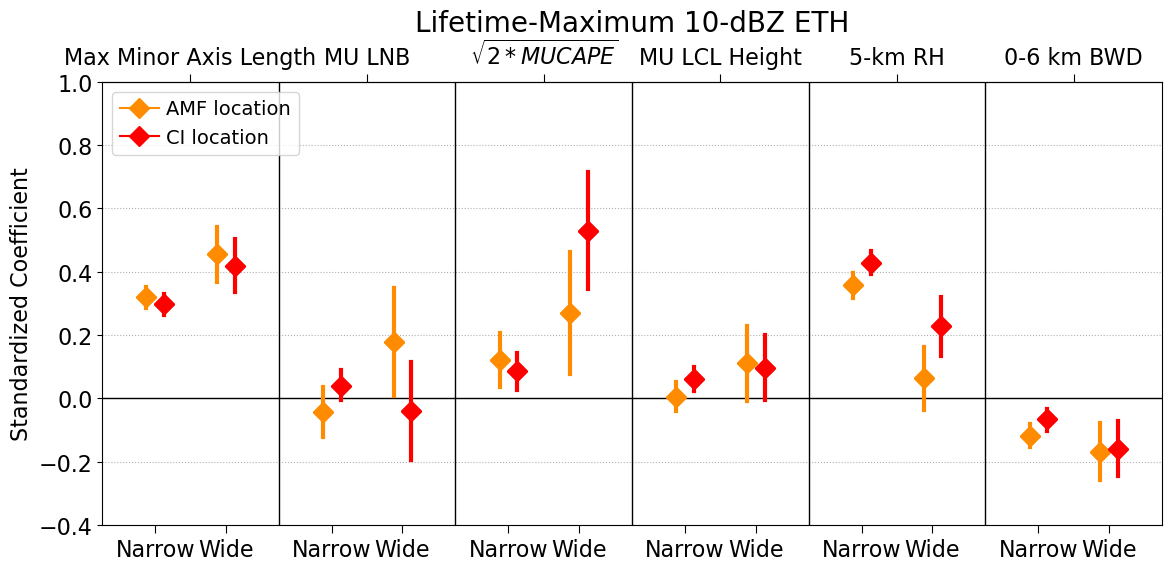

In [61]:
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,1,1)
ax1.plot([0,12], [0,0], 'k-', linewidth=1)

ax1.plot([0.5,0.5], [wrf_narrow_amf_stdcoef_all_eth[0], wrf_narrow_amf_stdcoef_all_eth[0]], color='darkorange', marker='D', markersize=10, label='AMF location')
ax1.plot([0.5,0.5], [wrf_narrow_amf_stdcoeflow_all_eth[0], wrf_narrow_amf_stdcoefhigh_all_eth[0]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([0.7,0.7], [wrf_narrow_ci_stdcoef_all_eth[0], wrf_narrow_ci_stdcoef_all_eth[0]], color='red', marker='D', markersize=10, label='CI location')
ax1.plot([0.7,0.7], [wrf_narrow_ci_stdcoeflow_all_eth[0], wrf_narrow_ci_stdcoefhigh_all_eth[0]], color='red', linestyle='-', linewidth=3)

ax1.plot([1.3,1.3], [wrf_wide_amf_stdcoef_all_eth[0], wrf_wide_amf_stdcoef_all_eth[0]], color='darkorange', marker='D', markersize=10)
ax1.plot([1.3,1.3], [wrf_wide_amf_stdcoeflow_all_eth[0], wrf_wide_amf_stdcoefhigh_all_eth[0]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([1.5,1.5], [wrf_wide_ci_stdcoef_all_eth[0], wrf_wide_ci_stdcoef_all_eth[0]], color='red', marker='D', markersize=10)
ax1.plot([1.5,1.5], [wrf_wide_ci_stdcoeflow_all_eth[0], wrf_wide_ci_stdcoefhigh_all_eth[0]], color='red', linestyle='-', linewidth=3)

ax1.plot([2.5,2.5], [wrf_narrow_amf_stdcoef_all_eth[1], wrf_narrow_amf_stdcoef_all_eth[1]], color='darkorange', marker='D', markersize=10)
ax1.plot([2.5,2.5], [wrf_narrow_amf_stdcoeflow_all_eth[1], wrf_narrow_amf_stdcoefhigh_all_eth[1]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([2.7,2.7], [wrf_narrow_ci_stdcoef_all_eth[1], wrf_narrow_ci_stdcoef_all_eth[1]], color='red', marker='D', markersize=10)
ax1.plot([2.7,2.7], [wrf_narrow_ci_stdcoeflow_all_eth[1], wrf_narrow_ci_stdcoefhigh_all_eth[1]], color='red', linestyle='-', linewidth=3)

ax1.plot([3.3,3.3], [wrf_wide_amf_stdcoef_all_eth[1], wrf_wide_amf_stdcoef_all_eth[1]], color='darkorange', marker='D', markersize=10)
ax1.plot([3.3,3.3], [wrf_wide_amf_stdcoeflow_all_eth[1], wrf_wide_amf_stdcoefhigh_all_eth[1]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([3.5,3.5], [wrf_wide_ci_stdcoef_all_eth[1], wrf_wide_ci_stdcoef_all_eth[1]], color='red', marker='D', markersize=10)
ax1.plot([3.5,3.5], [wrf_wide_ci_stdcoeflow_all_eth[1], wrf_wide_ci_stdcoefhigh_all_eth[1]], color='red', linestyle='-', linewidth=3)

ax1.plot([4.5,4.5], [wrf_narrow_amf_stdcoef_all_eth[2], wrf_narrow_amf_stdcoef_all_eth[2]], color='darkorange', marker='D', markersize=10)
ax1.plot([4.5,4.5], [wrf_narrow_amf_stdcoeflow_all_eth[2], wrf_narrow_amf_stdcoefhigh_all_eth[2]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([4.7,4.7], [wrf_narrow_ci_stdcoef_all_eth[2], wrf_narrow_ci_stdcoef_all_eth[2]], color='red', marker='D', markersize=10)
ax1.plot([4.7,4.7], [wrf_narrow_ci_stdcoeflow_all_eth[2], wrf_narrow_ci_stdcoefhigh_all_eth[2]], color='red', linestyle='-', linewidth=3)

ax1.plot([5.3,5.3], [wrf_wide_amf_stdcoef_all_eth[2], wrf_wide_amf_stdcoef_all_eth[2]], color='darkorange', marker='D', markersize=10)
ax1.plot([5.3,5.3], [wrf_wide_amf_stdcoeflow_all_eth[2], wrf_wide_amf_stdcoefhigh_all_eth[2]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([5.5,5.5], [wrf_wide_ci_stdcoef_all_eth[2], wrf_wide_ci_stdcoef_all_eth[2]], color='red', marker='D', markersize=10)
ax1.plot([5.5,5.5], [wrf_wide_ci_stdcoeflow_all_eth[2], wrf_wide_ci_stdcoefhigh_all_eth[2]], color='red', linestyle='-', linewidth=3)

ax1.plot([6.5,6.5], [wrf_narrow_amf_stdcoef_all_eth[3], wrf_narrow_amf_stdcoef_all_eth[3]], color='darkorange', marker='D', markersize=10)
ax1.plot([6.5,6.5], [wrf_narrow_amf_stdcoeflow_all_eth[3], wrf_narrow_amf_stdcoefhigh_all_eth[3]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([6.7,6.7], [wrf_narrow_ci_stdcoef_all_eth[3], wrf_narrow_ci_stdcoef_all_eth[3]], color='red', marker='D', markersize=10)
ax1.plot([6.7,6.7], [wrf_narrow_ci_stdcoeflow_all_eth[3], wrf_narrow_ci_stdcoefhigh_all_eth[3]], color='red', linestyle='-', linewidth=3)

ax1.plot([7.3,7.3], [wrf_wide_amf_stdcoef_all_eth[3], wrf_wide_amf_stdcoef_all_eth[3]], color='darkorange', marker='D', markersize=10)
ax1.plot([7.3,7.3], [wrf_wide_amf_stdcoeflow_all_eth[3], wrf_wide_amf_stdcoefhigh_all_eth[3]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([7.5,7.5], [wrf_wide_ci_stdcoef_all_eth[3], wrf_wide_ci_stdcoef_all_eth[3]], color='red', marker='D', markersize=10)
ax1.plot([7.5,7.5], [wrf_wide_ci_stdcoeflow_all_eth[3], wrf_wide_ci_stdcoefhigh_all_eth[3]], color='red', linestyle='-', linewidth=3)

ax1.plot([8.5,8.5], [wrf_narrow_amf_stdcoef_all_eth[4], wrf_narrow_amf_stdcoef_all_eth[4]], color='darkorange', marker='D', markersize=10)
ax1.plot([8.5,8.5], [wrf_narrow_amf_stdcoeflow_all_eth[4], wrf_narrow_amf_stdcoefhigh_all_eth[4]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([8.7,8.7], [wrf_narrow_ci_stdcoef_all_eth[4], wrf_narrow_ci_stdcoef_all_eth[4]], color='red', marker='D', markersize=10)
ax1.plot([8.7,8.7], [wrf_narrow_ci_stdcoeflow_all_eth[4], wrf_narrow_ci_stdcoefhigh_all_eth[4]], color='red', linestyle='-', linewidth=3)

ax1.plot([9.3,9.3], [wrf_wide_amf_stdcoef_all_eth[4], wrf_wide_amf_stdcoef_all_eth[4]], color='darkorange', marker='D', markersize=10)
ax1.plot([9.3,9.3], [wrf_wide_amf_stdcoeflow_all_eth[4], wrf_wide_amf_stdcoefhigh_all_eth[4]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([9.5,9.5], [wrf_wide_ci_stdcoef_all_eth[4], wrf_wide_ci_stdcoef_all_eth[4]], color='red', marker='D', markersize=10)
ax1.plot([9.5,9.5], [wrf_wide_ci_stdcoeflow_all_eth[4], wrf_wide_ci_stdcoefhigh_all_eth[4]], color='red', linestyle='-', linewidth=3)

ax1.plot([10.5,10.5], [wrf_narrow_amf_stdcoef_all_eth[5], wrf_narrow_amf_stdcoef_all_eth[5]], color='darkorange', marker='D', markersize=10)
ax1.plot([10.5,10.5], [wrf_narrow_amf_stdcoeflow_all_eth[5], wrf_narrow_amf_stdcoefhigh_all_eth[5]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([10.7,10.7], [wrf_narrow_ci_stdcoef_all_eth[5], wrf_narrow_ci_stdcoef_all_eth[5]], color='red', marker='D', markersize=10)
ax1.plot([10.7,10.7], [wrf_narrow_ci_stdcoeflow_all_eth[5], wrf_narrow_ci_stdcoefhigh_all_eth[5]], color='red', linestyle='-', linewidth=3)

ax1.plot([11.3,11.3], [wrf_wide_amf_stdcoef_all_eth[5], wrf_wide_amf_stdcoef_all_eth[5]], color='darkorange', marker='D', markersize=10)
ax1.plot([11.3,11.3], [wrf_wide_amf_stdcoeflow_all_eth[5], wrf_wide_amf_stdcoefhigh_all_eth[5]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([11.5,11.5], [wrf_wide_ci_stdcoef_all_eth[5], wrf_wide_ci_stdcoef_all_eth[5]], color='red', marker='D', markersize=10)
ax1.plot([11.5,11.5], [wrf_wide_ci_stdcoeflow_all_eth[5], wrf_wide_ci_stdcoefhigh_all_eth[5]], color='red', linestyle='-', linewidth=3)

ax1.set_xlim(0,12)
ax1.tick_params('x', length=6)
plt.xticks(ticks=[0.6,1.4,2.6,3.4,4.6,5.4,6.6,7.4,8.6,9.4,10.6,11.4],labels=['Narrow','Wide','Narrow','Wide','Narrow','Wide','Narrow','Wide','Narrow','Wide','Narrow','Wide'])
secax = ax1.secondary_xaxis('top')
secax.tick_params('x', length=6)
secax.set_xticks(ticks=[1,3,5,7,9,11])
secax.set_xticklabels([variables_all[0],variables_all[1],variables_all[2],variables_all[3],variables_all[4],variables_all[5]])
ax1.set_ylim(-0.4,1)
ax1.set_ylabel('Standardized Coefficient', color='black', fontsize=16)
ax1.set_title('Lifetime-Maximum 10-dBZ ETH', fontsize=20)
ax1.grid(axis='y', linestyle=':')
ax1.plot([2,2],[-1,1], 'k-', linewidth=1)
ax1.plot([4,4],[-1,1], 'k-', linewidth=1)
ax1.plot([6,6],[-1,1], 'k-', linewidth=1)
ax1.plot([8,8],[-1,1], 'k-', linewidth=1)
ax1.plot([10,10],[-1,1], 'k-', linewidth=1)
ax1.legend(loc='upper left', fontsize=14, ncol=1, labelspacing=0.5, columnspacing=2.0, handletextpad=0.4)

plt.tight_layout()
# plt.savefig('MLR_ETH_Standardized_Coefficients_All_CIloc-15min.png')
plt.savefig('MLR_ETH_Standardized_Coefficients_All_CIloc-15min_Ax.png')

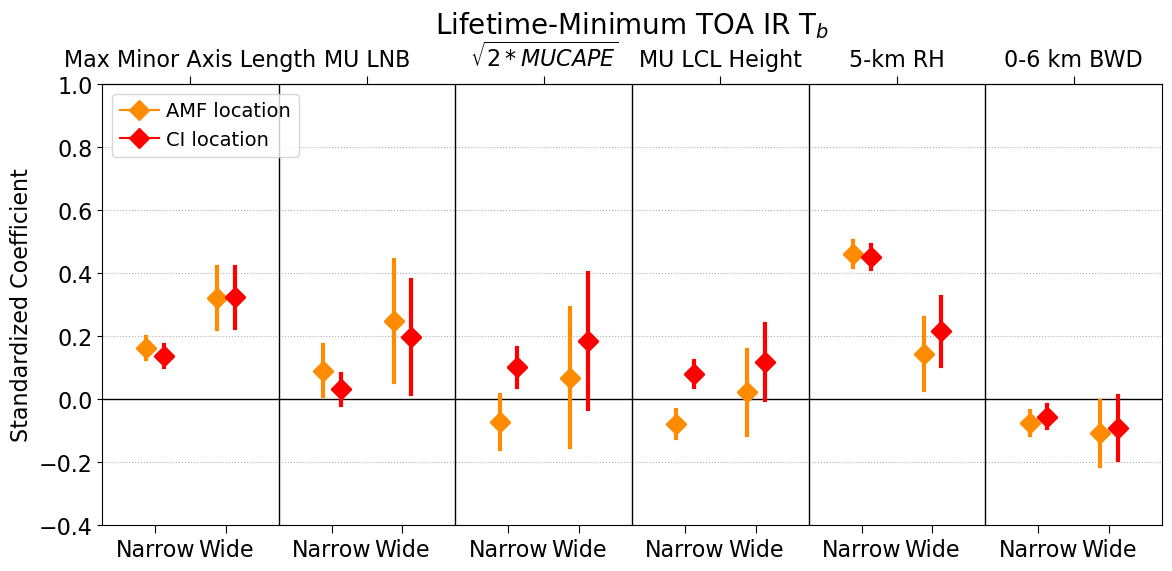

In [62]:
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,1,1)
ax1.plot([0,12], [0,0], 'k-', linewidth=1)

ax1.plot([0.5,0.5], [wrf_narrow_amf_stdcoef_all_irtb[0], wrf_narrow_amf_stdcoef_all_irtb[0]], color='darkorange', marker='D', markersize=10, label='AMF location')
ax1.plot([0.5,0.5], [wrf_narrow_amf_stdcoeflow_all_irtb[0], wrf_narrow_amf_stdcoefhigh_all_irtb[0]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([0.7,0.7], [wrf_narrow_ci_stdcoef_all_irtb[0], wrf_narrow_ci_stdcoef_all_irtb[0]], color='red', marker='D', markersize=10, label='CI location')
ax1.plot([0.7,0.7], [wrf_narrow_ci_stdcoeflow_all_irtb[0], wrf_narrow_ci_stdcoefhigh_all_irtb[0]], color='red', linestyle='-', linewidth=3)

ax1.plot([1.3,1.3], [wrf_wide_amf_stdcoef_all_irtb[0], wrf_wide_amf_stdcoef_all_irtb[0]], color='darkorange', marker='D', markersize=10)
ax1.plot([1.3,1.3], [wrf_wide_amf_stdcoeflow_all_irtb[0], wrf_wide_amf_stdcoefhigh_all_irtb[0]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([1.5,1.5], [wrf_wide_ci_stdcoef_all_irtb[0], wrf_wide_ci_stdcoef_all_irtb[0]], color='red', marker='D', markersize=10)
ax1.plot([1.5,1.5], [wrf_wide_ci_stdcoeflow_all_irtb[0], wrf_wide_ci_stdcoefhigh_all_irtb[0]], color='red', linestyle='-', linewidth=3)

ax1.plot([2.5,2.5], [wrf_narrow_amf_stdcoef_all_irtb[1], wrf_narrow_amf_stdcoef_all_irtb[1]], color='darkorange', marker='D', markersize=10)
ax1.plot([2.5,2.5], [wrf_narrow_amf_stdcoeflow_all_irtb[1], wrf_narrow_amf_stdcoefhigh_all_irtb[1]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([2.7,2.7], [wrf_narrow_ci_stdcoef_all_irtb[1], wrf_narrow_ci_stdcoef_all_irtb[1]], color='red', marker='D', markersize=10)
ax1.plot([2.7,2.7], [wrf_narrow_ci_stdcoeflow_all_irtb[1], wrf_narrow_ci_stdcoefhigh_all_irtb[1]], color='red', linestyle='-', linewidth=3)

ax1.plot([3.3,3.3], [wrf_wide_amf_stdcoef_all_irtb[1], wrf_wide_amf_stdcoef_all_irtb[1]], color='darkorange', marker='D', markersize=10)
ax1.plot([3.3,3.3], [wrf_wide_amf_stdcoeflow_all_irtb[1], wrf_wide_amf_stdcoefhigh_all_irtb[1]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([3.5,3.5], [wrf_wide_ci_stdcoef_all_irtb[1], wrf_wide_ci_stdcoef_all_irtb[1]], color='red', marker='D', markersize=10)
ax1.plot([3.5,3.5], [wrf_wide_ci_stdcoeflow_all_irtb[1], wrf_wide_ci_stdcoefhigh_all_irtb[1]], color='red', linestyle='-', linewidth=3)

ax1.plot([4.5,4.5], [wrf_narrow_amf_stdcoef_all_irtb[2], wrf_narrow_amf_stdcoef_all_irtb[2]], color='darkorange', marker='D', markersize=10)
ax1.plot([4.5,4.5], [wrf_narrow_amf_stdcoeflow_all_irtb[2], wrf_narrow_amf_stdcoefhigh_all_irtb[2]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([4.7,4.7], [wrf_narrow_ci_stdcoef_all_irtb[2], wrf_narrow_ci_stdcoef_all_irtb[2]], color='red', marker='D', markersize=10)
ax1.plot([4.7,4.7], [wrf_narrow_ci_stdcoeflow_all_irtb[2], wrf_narrow_ci_stdcoefhigh_all_irtb[2]], color='red', linestyle='-', linewidth=3)

ax1.plot([5.3,5.3], [wrf_wide_amf_stdcoef_all_irtb[2], wrf_wide_amf_stdcoef_all_irtb[2]], color='darkorange', marker='D', markersize=10)
ax1.plot([5.3,5.3], [wrf_wide_amf_stdcoeflow_all_irtb[2], wrf_wide_amf_stdcoefhigh_all_irtb[2]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([5.5,5.5], [wrf_wide_ci_stdcoef_all_irtb[2], wrf_wide_ci_stdcoef_all_irtb[2]], color='red', marker='D', markersize=10)
ax1.plot([5.5,5.5], [wrf_wide_ci_stdcoeflow_all_irtb[2], wrf_wide_ci_stdcoefhigh_all_irtb[2]], color='red', linestyle='-', linewidth=3)

ax1.plot([6.5,6.5], [wrf_narrow_amf_stdcoef_all_irtb[3], wrf_narrow_amf_stdcoef_all_irtb[3]], color='darkorange', marker='D', markersize=10)
ax1.plot([6.5,6.5], [wrf_narrow_amf_stdcoeflow_all_irtb[3], wrf_narrow_amf_stdcoefhigh_all_irtb[3]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([6.7,6.7], [wrf_narrow_ci_stdcoef_all_irtb[3], wrf_narrow_ci_stdcoef_all_irtb[3]], color='red', marker='D', markersize=10)
ax1.plot([6.7,6.7], [wrf_narrow_ci_stdcoeflow_all_irtb[3], wrf_narrow_ci_stdcoefhigh_all_irtb[3]], color='red', linestyle='-', linewidth=3)

ax1.plot([7.3,7.3], [wrf_wide_amf_stdcoef_all_irtb[3], wrf_wide_amf_stdcoef_all_irtb[3]], color='darkorange', marker='D', markersize=10)
ax1.plot([7.3,7.3], [wrf_wide_amf_stdcoeflow_all_irtb[3], wrf_wide_amf_stdcoefhigh_all_irtb[3]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([7.5,7.5], [wrf_wide_ci_stdcoef_all_irtb[3], wrf_wide_ci_stdcoef_all_irtb[3]], color='red', marker='D', markersize=10)
ax1.plot([7.5,7.5], [wrf_wide_ci_stdcoeflow_all_irtb[3], wrf_wide_ci_stdcoefhigh_all_irtb[3]], color='red', linestyle='-', linewidth=3)

ax1.plot([8.5,8.5], [wrf_narrow_amf_stdcoef_all_irtb[4], wrf_narrow_amf_stdcoef_all_irtb[4]], color='darkorange', marker='D', markersize=10)
ax1.plot([8.5,8.5], [wrf_narrow_amf_stdcoeflow_all_irtb[4], wrf_narrow_amf_stdcoefhigh_all_irtb[4]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([8.7,8.7], [wrf_narrow_ci_stdcoef_all_irtb[4], wrf_narrow_ci_stdcoef_all_irtb[4]], color='red', marker='D', markersize=10)
ax1.plot([8.7,8.7], [wrf_narrow_ci_stdcoeflow_all_irtb[4], wrf_narrow_ci_stdcoefhigh_all_irtb[4]], color='red', linestyle='-', linewidth=3)

ax1.plot([9.3,9.3], [wrf_wide_amf_stdcoef_all_irtb[4], wrf_wide_amf_stdcoef_all_irtb[4]], color='darkorange', marker='D', markersize=10)
ax1.plot([9.3,9.3], [wrf_wide_amf_stdcoeflow_all_irtb[4], wrf_wide_amf_stdcoefhigh_all_irtb[4]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([9.5,9.5], [wrf_wide_ci_stdcoef_all_irtb[4], wrf_wide_ci_stdcoef_all_irtb[4]], color='red', marker='D', markersize=10)
ax1.plot([9.5,9.5], [wrf_wide_ci_stdcoeflow_all_irtb[4], wrf_wide_ci_stdcoefhigh_all_irtb[4]], color='red', linestyle='-', linewidth=3)

ax1.plot([10.5,10.5], [wrf_narrow_amf_stdcoef_all_irtb[5], wrf_narrow_amf_stdcoef_all_irtb[5]], color='darkorange', marker='D', markersize=10)
ax1.plot([10.5,10.5], [wrf_narrow_amf_stdcoeflow_all_irtb[5], wrf_narrow_amf_stdcoefhigh_all_irtb[5]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([10.7,10.7], [wrf_narrow_ci_stdcoef_all_irtb[5], wrf_narrow_ci_stdcoef_all_irtb[5]], color='red', marker='D', markersize=10)
ax1.plot([10.7,10.7], [wrf_narrow_ci_stdcoeflow_all_irtb[5], wrf_narrow_ci_stdcoefhigh_all_irtb[5]], color='red', linestyle='-', linewidth=3)

ax1.plot([11.3,11.3], [wrf_wide_amf_stdcoef_all_irtb[5], wrf_wide_amf_stdcoef_all_irtb[5]], color='darkorange', marker='D', markersize=10)
ax1.plot([11.3,11.3], [wrf_wide_amf_stdcoeflow_all_irtb[5], wrf_wide_amf_stdcoefhigh_all_irtb[5]], color='darkorange', linestyle='-', linewidth=3)
ax1.plot([11.5,11.5], [wrf_wide_ci_stdcoef_all_irtb[5], wrf_wide_ci_stdcoef_all_irtb[5]], color='red', marker='D', markersize=10)
ax1.plot([11.5,11.5], [wrf_wide_ci_stdcoeflow_all_irtb[5], wrf_wide_ci_stdcoefhigh_all_irtb[5]], color='red', linestyle='-', linewidth=3)

ax1.set_xlim(0,12)
ax1.tick_params('x', length=6)
plt.xticks(ticks=[0.6,1.4,2.6,3.4,4.6,5.4,6.6,7.4,8.6,9.4,10.6,11.4],labels=['Narrow','Wide','Narrow','Wide','Narrow','Wide','Narrow','Wide','Narrow','Wide','Narrow','Wide'])
secax = ax1.secondary_xaxis('top')
secax.tick_params('x', length=6)
secax.set_xticks(ticks=[1,3,5,7,9,11])
secax.set_xticklabels([variables_all[0],variables_all[1],variables_all[2],variables_all[3],variables_all[4],variables_all[5]])
ax1.set_ylim(-0.4,1)
ax1.set_ylabel('Standardized Coefficient', color='black', fontsize=16)
ax1.set_title('Lifetime-Minimum TOA IR T$_b$', fontsize=20)
ax1.grid(axis='y', linestyle=':')
ax1.plot([2,2],[-1,1], 'k-', linewidth=1)
ax1.plot([4,4],[-1,1], 'k-', linewidth=1)
ax1.plot([6,6],[-1,1], 'k-', linewidth=1)
ax1.plot([8,8],[-1,1], 'k-', linewidth=1)
ax1.plot([10,10],[-1,1], 'k-', linewidth=1)
ax1.legend(loc='upper left', fontsize=14, ncol=1, labelspacing=0.5, columnspacing=2.0, handletextpad=0.4)

plt.tight_layout()
# plt.savefig('MLR_IRTb_Standardized_Coefficients_All_CIloc-15min.png')
plt.savefig('MLR_IRTb_Standardized_Coefficients_All_CIloc-15min_Ax.png')